# Research of advertisements for the sale of apartments

## Research content <a id='contents'> </a>

* [1. Research purpose](#purpose)
* [2. Data overview](#data_overview)
* [3. Data preprocessing](#data_preprocessing)
    * [3.1. Working with gaps](#gaps)
     - [3.1.1. Gaps in map data](#gaps_in_map_data)
     - [3.1.2. Gaps in user-added data](#gaps_in_manual_data)
     - [3.1.3. Conclusions](#conclusions_3_1)
    * [3.2. Changing data types](#types)
    * [3.3. Handling duplicates](#duplicates)
    * [3.4. Handling anomalies](#anomalies)
     - [3.4.1. Column 'last_price'](#last_price)
     - [3.4.2. Columns 'total_area', 'living_area', 'kitchen_area'](#areas)
     - [3.4.3. Columns 'floors_total', 'floor', 'rooms', 'balcony'](#floors)
     - [3.4.4. Column 'total_images'](#total_images)
     - [3.4.5. Column 'days_exposition'](#days_exposition)
     - [3.4.6. Columns 'airports_nearest', 'cityCenters_nearest'](#airports)
     - [3.4.7. Columns 'parks_nearest', 'ponds_nearest'](#parks)
     - [3.4.8. Columns 'parks_around3000', 'ponds_around3000'](#parks3000)
     - [3.4.9. Column 'first_day_exposition'](#first_day_exposition)
     - [3.4.10. Column 'ceiling_height'](#ceiling_height)
     - [3.4.11. Conclusions](#conclusions_3_4)
    * [3.5. Adding new columns](#add_new_columns)
* [4. Exploratory data analysis](#research)
    * [4.1. Examining object parameters](#parameters)
     - [4.1.1. Total area](#par_total_area)
     - [4.1.2. Living area](#par_living_area)
     - [4.1.3. Kitchen area](#par_kitchen_area)
     - [4.1.4. Apartment price](#par_last_price)
     - [4.1.5. Number of rooms](#par_rooms)
     - [4.1.6. Ceiling height](#par_ceiling_height)
     - [4.1.7. Apartment floor](#par_floor)
     - [4.1.8. Apartment floor type](#par_floor_type)
     - [4.1.9. Total number of floors in the house](#par_floors_total)
     - [4.1.10. Distance to city center in meters](#par_cityCenters_nearest)
     - [4.1.11. Distance to nearest airport](#par_airports_nearest)
     - [4.1.12. Distance to nearest park](#par_parks_nearest)
     - [4.1.13. Day and month of ad publication](#par_day_month_of_exposition)
     - [4.1.14. Apartment sale time](#par_days_of_exposition)
     - [4.1.15. Conclusions](#conclusions_4_1)
    * [4.2. Study of the influence of parameters on the cost of an apartment](#parameters_to_price)
    * [4.3. Calculation of the average price per square meter by settlements](#price_per_m2)
    * [4.4. Calculation of the average price per kilometer to the city center](#price_per_km)
* [5. Research results](#research_results)

## 1. Research purpose <a id='purpose'> </a>

We have at our disposal the data of the Yandex.Realty service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. The task is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

This work consists of the following steps:  
1) loading data from a file, studying general information and building a common histogram for all columns of the table;

2) data preprocessing:  
 + find, study and fill, where possible, gaps in the data;  
 + indicate the possible reasons that could lead to gaps in the data;  
 + convert the data type where necessary;  
 + get rid of explicit and implicit duplicates;  
 + find and eliminate anomalous values in the data;  
 
3) adding new columns to the table with the following parameters:  
 + price of one square meter;  
 + the day of the week the announcement was published (0 - Monday, 1 - Tuesday, and so on);  
 + month of publication of the announcement;  
 + year of publication of the announcement;  
 + apartment floor type (values — “first”, “last”, “other”);  
 + distance to the city center in kilometers;  

4) conducting exploratory data analysis:  
 + study the parameters of objects, construct histograms for each parameter and describe all observations;  
 + we will study how quickly apartments were sold;  
 + we will study what factors most influence the total (full) cost of the object;  
 + calculate the average price of one square meter in 10 settlements with the largest number of ads and highlight the settlements with the highest and lowest cost per square meter;  
 + study how the cost of objects depends on the distance to the city center and calculate the average price of each kilometer to the center of St. Petersburg;  
 
5) describe research results.  

## 2. Data overview <a id='data_overview'> </a>

Let's open the data file and display the first 20 lines of the provided data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(20))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


The table contains the following data:

* `total_images` - the number of photos of the apartment in the ad
* `last_price` - price at the time of removal from publication
* `total_area` - total area of the apartment in square meters (m²)
* `first_day_exposition` - publication date
* `rooms` - number of rooms
* `ceiling_height` - ceiling height (m)
* `floors_total` - total floors in the building
* `living_area` - living area in square meters (m²)
* `floor` - floor
* `is_apartment` - apartments (boolean)
* `studio` - studio apartment (boolean)
* `open_plan` - open plan (boolean)
* `kitchen_area` - kitchen area in square meters (m²)
* `balcony` - number of balconies
* `locality_name` - locality name
* `airports_nearest` - distance to the nearest airport in meters (m)
* `cityCenters_nearest` - distance to city center (m)
* `parks_around3000` - number of parks within a 3 km radius
* `parks_nearest` - distance to the nearest park (m)
* `ponds_around3000` - number of ponds within 3 km radius
* `ponds_nearest` - distance to the nearest body of water (m)
* `days_exposition` - how many days the ad was placed (from publication to withdrawal)

Let's display general information about the dataframe.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The following conclusions can be drawn from the general data:  
1) there are gaps in many columns;  
2) there are rows where cartographic data is completely missing (columns `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`);  
3) data type in some columns should be changed:  
    - in columns `last_price`, `floors_total`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` from *float64* to *int64;  
    - the `is_apartment` column must have a boolean data type, not a string;  
    - in the `first_day_exposition` column, it is necessary to convert the data from the string type to the *datetime* type.

Let's build a common histogram for all columns of the table.

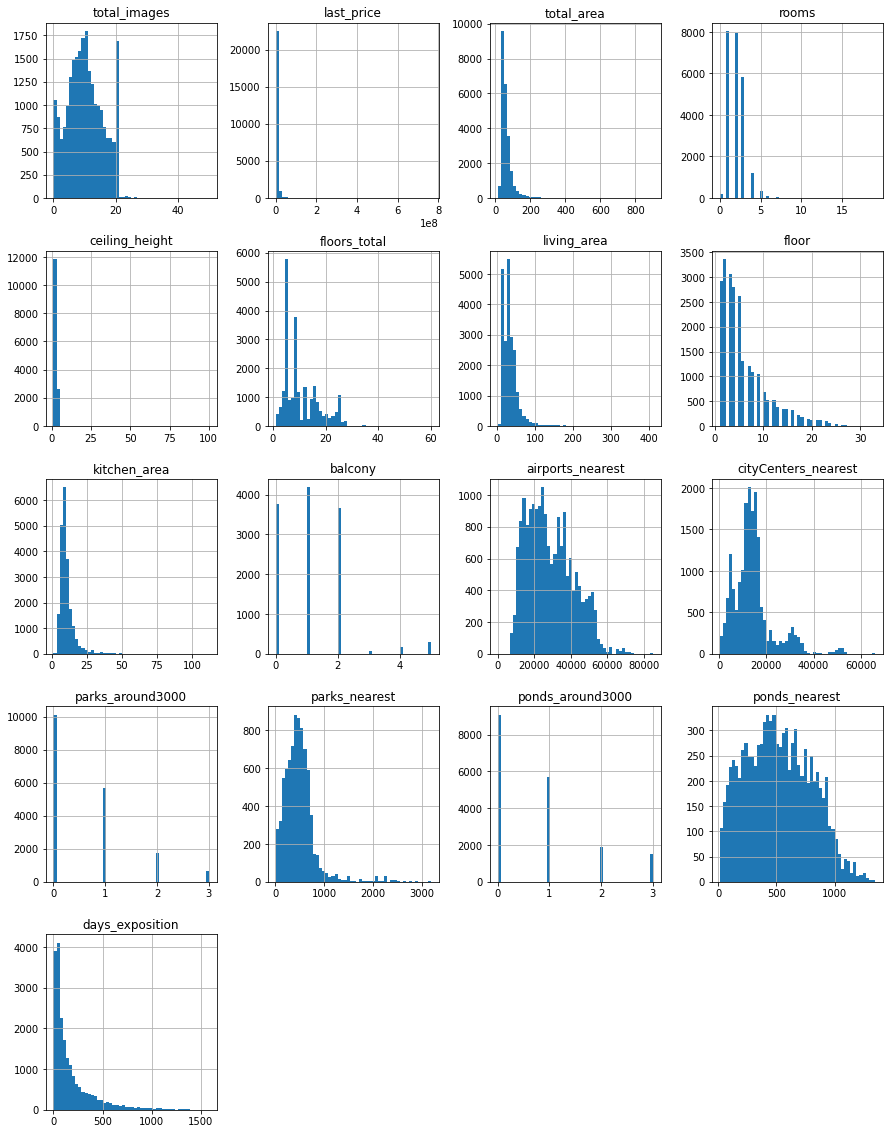

In [3]:
data.hist(bins=50, figsize=(15, 20));

## 3. Data preprocessing <a id='data_preprocessing'> </a>  

### 3.1.  Working with gaps <a id='gaps'> </a> 

Determine which columns have data gaps.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
def pass_value_barh(df):
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Number of skips across table columns' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

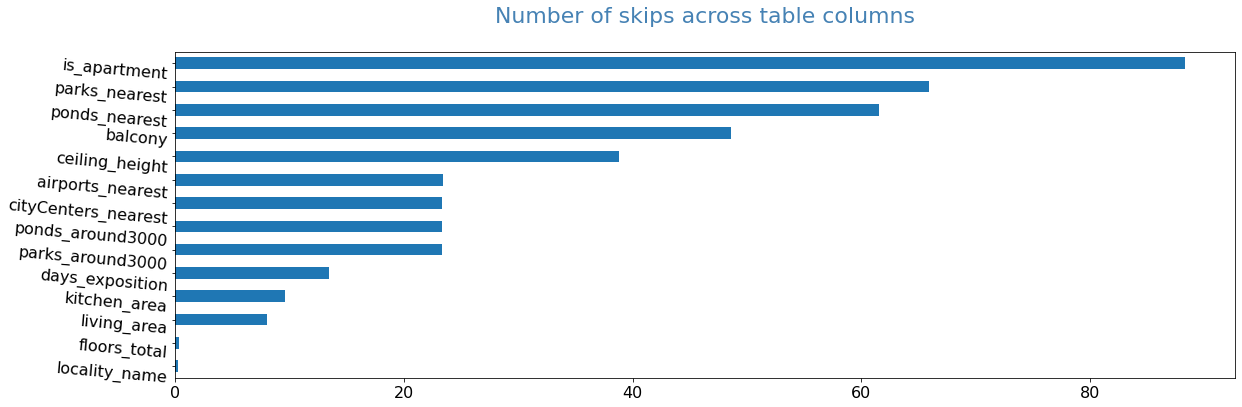

In [6]:
pass_value_barh(data)

#### 3.1.1. Gaps in map data <a id='gaps_in_map_data'> </a>

Consider gaps in the map data, which include the columns `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`.
If the line is completely missing cartographic data, this indicates a technical problem in collecting or transmitting data on the property. It is impossible to fill in such gaps, so we will leave these values ​​blank. Store the rows with completely missing cartographic data in the `cartographic_data_is_nan` variable and count the number of rows with completely missing cartographic data.

In [7]:
cartographic_data_is_nan = data.query('airports_nearest.isna() and cityCenters_nearest.isna()\
                                      and parks_around3000.isna() and parks_nearest.isna()\
                                      and ponds_around3000.isna() and ponds_nearest.isna()')
print('Number of rows in a dataframe with completely missing map data: {}'
      .format(len(cartographic_data_is_nan)))

Number of rows in a dataframe with completely missing map data: 5518


This value matches the number of gaps in the `parks_around3000` and `ponds_around3000` columns, which means that there are no rows where the values in the `parks_around3000` and `ponds_around3000` columns would be missing, but other map data would be present. This means that it is not possible to fill in the gaps in the `parks_around3000` and `ponds_around3000` columns.

We will display the TOP-10 settlements with missing cartographic data.

In [8]:
cartographic_data_is_nan['locality_name'].value_counts().head(10)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

As can be seen from the list above, cartographic data are missing mainly for small towns, villages and towns in the Leningrad region.

There are also rows in the dataframe that are missing only some cartographic data. The most common gaps are in the `parks_nearest` and `ponds_nearest` columns. Let's count the number of rows with gaps in these columns, not taking into account the rows where cartographic data is completely missing.

In [9]:
parks_and_ponds_nearest_is_na = data.query('(parks_nearest.isna() or ponds_nearest.isna())\
                                            and (not parks_around3000.isna())')
print('Number of rows in a dataframe with missing distance data to the nearest park or body of water: {}'
      .format(len(parks_and_ponds_nearest_is_na)))

Number of rows in a dataframe with missing distance data to the nearest park or body of water: 13357


Let's find out what values the `parks_around3000` and `ponds_around3000` columns have when there are no values in the `parks_nearest` and `ponds_nearest` columns, respectively.

In [10]:
parks_and_ponds_nearest_is_na.query('parks_nearest.isna()')['parks_around3000'].value_counts()

0.0    10102
Name: parks_around3000, dtype: int64

In [11]:
parks_and_ponds_nearest_is_na.query('ponds_nearest.isna()')['ponds_around3000'].value_counts()

0.0    9071
Name: ponds_around3000, dtype: int64

There are rows in the dataframe where the distance to the nearest park or body of water is not indicated for the property, but the number of parks or bodies of water within a radius of 3 km is set to zero. This means that the distance to the nearest park or body of water is more than 3000 m. Theoretically, such gaps in the distance to the nearest park or body of water can be filled with any value > 3000 so that the property falls into the appropriate category for these parameters, but parks and ponds are not the most important parameters of the apartment, so we will leave the data unchanged.
There are also a small number of gaps in the `airports_nearest` and `cityCenters_nearest` columns that do not refer to the complete absence of map data (i.e. other map data is present). There are 24 and 1 such passes, respectively. The presence of gaps may be due to the fact that these are calculated data and for some reason the system was unable to calculate distances for specific objects. Let's leave this data unchanged.

#### 3.1.2. Gaps in user-added data <a id='gaps_in_manual_data'> </a> 

The rest of the dataframe columns refer to data entered by the user.

* **The `ceiling_height`** column has 9195 data gaps, which means almost 40% of the data is missing. Most likely, users either do not know the height of the ceilings in the apartments, or do not consider this parameter important and mandatory. Ceiling height is a general building parameter. As a rule, the height of the ceilings in apartments in the same building is the same. Missing values can be filled in with values from other apartments for sale in the same building. The apartments are located in the same building, if the cartographic data of the apartments completely match. Let's make a slice by map data for the object in line with index 3, which does not have a ceiling height value.

In [12]:
ceiling_height_is_na_sum = data['ceiling_height'].isna().sum()
data.query('airports_nearest == 28098 and cityCenters_nearest == 6800 and parks_nearest == 84 and ponds_nearest == 234')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
8261,20,36000000.0,123.2,2018-01-14T00:00:00,1,3.0,14.0,31.2,7,NaN,...,58.4,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,61.0
12223,20,59000000.0,127.5,2017-01-24T00:00:00,4,3.0,12.0,85.0,8,NaN,...,13.0,4.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,5.0
22709,20,59000000.0,127.5,2016-12-21T00:00:00,4,3.0,12.0,85.0,8,NaN,...,13.0,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,635.0


We can see that there are ads for sale of 4 apartments in the same building in the dataset, since their map data is exactly the same. In three of the four lines, the value of the ceiling height is present and is equal to 3 meters. So we can fill in the missing value with this data. Let's write a `building_parameters_filling` function that will take a dataframe string, check that it does not contain the parameter we need and that all cartographic data is present, slice from the dataframe by cartographic parameters and the presence of a ceiling height value, and return this value.

In [13]:
def building_parameters_filling(row):
    global data, parameter # use global variables: dataframe and column to be filled
    if (np.isnan(row[parameter]) & ~np.isnan(row['airports_nearest']) & ~np.isnan(row['cityCenters_nearest']) & 
    ~np.isnan(row['parks_nearest']) & ~np.isnan(row['ponds_nearest'])): # if there is no parameter in the string, but there is cartographic data,
        value = data.loc[(~np.isnan(data[parameter])) &                 # make a slice from data with rows with the same map data, and where the desired parameter is present
                         (data['airports_nearest'] == row['airports_nearest']) & 
                         (data['cityCenters_nearest'] == row['cityCenters_nearest']) & 
                         (data['parks_nearest'] == row['parks_nearest']) & 
                         (data['ponds_nearest'] == row['ponds_nearest']), parameter]
        try:                                                          # the value variable will contain either a number (type int or float),
            if isinstance(value, int) or isinstance(value, float):    # either a Series object (then we update the indices in it and return the first value),
                return value                                          # or nothing (in this case, wrap the condition in a try-except)
            else:
                return value.reset_index(drop=True).loc[0]
        except:
            return row[parameter]
    return row[parameter]

Let's apply our function to the dataframe.

In [14]:
parameter = 'ceiling_height'
data[parameter] = data.apply(building_parameters_filling, axis=1)

Let's check that the missing value is filled in. Let's display the same 4 apartments in the same building.

In [15]:
data.query('airports_nearest == 28098 and cityCenters_nearest == 6800 and parks_nearest == 84 and ponds_nearest == 234')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,3.0,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
8261,20,36000000.0,123.2,2018-01-14T00:00:00,1,3.0,14.0,31.2,7,NaN,...,58.4,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,61.0
12223,20,59000000.0,127.5,2017-01-24T00:00:00,4,3.0,12.0,85.0,8,NaN,...,13.0,4.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,5.0
22709,20,59000000.0,127.5,2016-12-21T00:00:00,4,3.0,12.0,85.0,8,NaN,...,13.0,1.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,635.0


We see that the missing value of the ceiling height in the line with index 3 was filled with the value of the ceiling height of other apartments in the same building.

In [16]:
print('Thus, we managed to fill in {} of {} gaps'
      .format(ceiling_height_is_na_sum - data['ceiling_height'].isna().sum(), ceiling_height_is_na_sum))

Thus, we managed to fill in 836 of 9195 gaps


* **The `floors_total`** column has 86 data gaps. Data may be missing due to optional filling. It would not be correct to fill in this data using data on the number of floors of another apartment in the same building. Very often, the number of storeys of the same house is different. Let's check this with an example from the data. Let's output a line where there are no number of floors, but there are cartographic data.

In [17]:
data.loc[(np.isnan(data['floors_total'])) & (~np.isnan(data['airports_nearest'])) & (~np.isnan(data['cityCenters_nearest'])) & 
        (~np.isnan(data['parks_nearest'])) & (~np.isnan(data['ponds_nearest']))].head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.7,NaN,38.4,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0


Let's make a slice from the dataframe according to the cartographic data of this object and find all the apartments in this house.

In [18]:
data.query('airports_nearest == 37364 & cityCenters_nearest == 8322 & parks_nearest == 309 & ponds_nearest == 706')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.7,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
4078,4,6106066.0,67.1,2019-01-29T00:00:00,2,2.7,20.0,30.00,19,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,91.0
4140,4,10296437.0,100.3,2017-07-02T00:00:00,3,2.7,NaN,58.18,3,NaN,...,10.90,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,35.0
4905,4,6021683.0,77.7,2019-02-22T00:00:00,3,2.7,21.0,49.98,17,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,5.0
5120,4,4972336.0,58.5,2018-12-30T00:00:00,2,2.7,21.0,32.46,2,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,37.0
6780,4,6082790.0,79.0,2019-01-29T00:00:00,3,2.7,23.0,43.60,8,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,14.0
11458,4,5951934.0,76.8,2019-01-29T00:00:00,3,2.7,20.0,49.33,2,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,30.0
15437,4,6177643.0,77.7,2019-02-13T00:00:00,3,2.7,20.0,49.98,18,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,35.0
23075,4,6029433.0,77.8,2019-01-29T00:00:00,3,2.7,21.0,49.98,6,NaN,...,NaN,NaN,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,21.0


There were 9 apartments for sale in this building. We see that the number of floors in the same house is different: from 20 to 23 floors. Fill in all missing values with zeros.

In [19]:
data['floors_total'] = data['floors_total'].fillna(0)

* **The `living_area`** column has 1903 data gaps. The data may not be filled in due to the fact that it is not required to be filled in, or the user does not know the living area, or cannot separate the living area from the kitchen area, which is typical for studios. Let's check how many of the 1903 gaps in the `living_area` column are for studio apartments.

In [20]:
data.query('studio == True')['living_area'].isna().sum()

10

Only 10 out of 1903 passes are for studio apartments, so most likely users simply do not know the living area of the apartment. Usually everyone knows only the total area.

* **The `is_apartment`** column has 20924 gaps in the data, i.e. almost 88% of the data is missing. These gaps must be filled in. Let's see what values this column has.

In [21]:
data['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Only 2775 users knew exactly the difference between apartments and apartments, all the rest (including me) do not know the difference, and therefore leave the field blank. To avoid omissions in the future, it may be necessary to provide background information on the difference between apartments and flats on the form. It is not possible to logically fill in the gaps in this column, as the difference between apartments and apartments may not be known to both apartment owners and apartment owners. You will have to leave these values blank.

* **The `kitchen_area`** column has 2278 missing values. By analogy with the `living_area` column, let's check whether these passes refer to studio apartments.

In [22]:
data.query('studio == True')['kitchen_area'].isna().sum()

149

Only 149 out of 2278 passes are for studio apartments, so most likely users simply do not know the area of ​​the kitchen and considered it optional to fill it out.

* **The `balcony`** column has 11519 missing values, which means almost 50% of the data is missing. Most likely, the seller did not indicate the number of balconies, since there are none in his apartment, so we will fill in all the gaps with the value 0.

In [23]:
data['balcony'] = data['balcony'].fillna(0)

* **The `locality_name`** column has 49 missing values. Most likely, these are random omissions, when the seller simply forgot to indicate the name of the locality. This data can be partially filled. We have already noted that the dataframe contains data on real estate in St. Petersburg and the Leningrad region. Let's find out what the maximum value of the distance to the city center applies to St. Petersburg and use it as a condition for filling the `locality_name` column with the value *'St. Petersburg'*.

In [24]:
print('The maximum value of the distance to the city center for a property in St. Petersburg: {} м'
      .format(data.query("locality_name == 'Санкт-Петербург'")['cityCenters_nearest'].max()))

The maximum value of the distance to the city center for a property in St. Petersburg: 29493.0 м


So, we will assume that all real estate objects within a radius of 30 km from the city center are located in St. Petersburg. Fill in the gaps in the `locality_name` column with the value *'Saint Petersburg'* for rows where the value of the distance to the city center `cityCenters_nearest` < 30000

In [25]:
locality_name_is_na_sum = data['locality_name'].isna().sum()
data.loc[(data['locality_name'].isna()) & (data['cityCenters_nearest'] < 30000), 'locality_name'] = 'Санкт-Петербург'
print('Thus, we managed to fill in {} of {} gaps'
      .format(locality_name_is_na_sum - data['locality_name'].isna().sum(), locality_name_is_na_sum))

Thus, we managed to fill in 38 of 49 gaps


* **The `days_exposition`** column has 3181 missing values. Perhaps these are not yet sold apartments, or sold, but the seller has not removed the announcement of the sale. It would be incorrect to fill these gaps with zero, mean or median, so we will leave the data unchanged.

#### 3.1.3. Conclusions <a id='conclusions_3_1'> </a>

1) The gaps in the map data (columns `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`) are not random. This is the result of a technical problem - the map data for the features was either not generated by the system or was not uploaded. It is necessary to carry out work to identify the causes of omissions.  
2) The omissions in the data added by the seller are mainly caused by the fact that the form fields are not required to be filled in, the seller does not know the parameters of his apartment. To reduce the number of gaps in the data, you can do the following:  
    - make all fields of the form for the seller mandatory;  
    - add help information for the user about the differences between apartments and apartments;  
    - add reference information for the user on where he can see such apartment parameters as ceiling height, living area and kitchen area.

### 3.2. Changing data types <a id='types'> </a>  

Let's change the data type from *float64* to *int64* in the columns `last_price`, `balcony`, `floors_total` for ease of viewing, since these are integer values. In the columns `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`, `parks_around3000`, `ponds_around3000`, `days_exposition` it is not possible to change the data type from *float64* to *int64*, since NaN remained in them .

In [26]:
data[['last_price', 'balcony', 'floors_total']] = data[['last_price', 'balcony', 'floors_total']].astype(int)

Let's change the data type in the `is_apartment` column from string to boolean.

In [27]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Let's convert the data in the `first_day_exposition` column from the string type to the *datetime* type for subsequent work with the date.

In [28]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

**Result**: converted types in 4 columns of the original table.

### 3.3. Handling duplicates <a id='duplicates'> </a> 

Check the dataframe for duplicate rows.

In [29]:
print(f'The table has {data.duplicated().sum()} duplicate rows.')

The table has 0 duplicate rows.


Let's check the `locality_name` column for implicit duplicates.

In [30]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [31]:
print(f"Number of unique values in a column \'locality_name\': {len(data['locality_name'].unique())}")

Number of unique values in a column 'locality_name': 365


There are implicit duplicates in the `locality_name` column: the same settlements can have the words "village", "village", "village/urban-type settlement", "urban village/village", "cottage village/village", as well as "settlement/settlement of the station" and "settlement/settlement at the railway station". Let's write a `change_locality_name` function that will replace the locality names like this:  
1) first, all the words 'village' will be replaced by 'village';  
2) then 'urban-type settlement', 'urban settlement', 'cottage settlement' will be replaced by 'village';  
3) 'station village' will be replaced by 'railway station village'.

In [32]:
def change_locality_name(locality_name):
    if str(locality_name).find('поселок') != -1:
        locality_name = locality_name.replace('поселок', 'посёлок')
    if str(locality_name).find('посёлок городского типа') != -1:
        locality_name = locality_name.replace('посёлок городского типа', 'посёлок')
    if str(locality_name).find('городской посёлок') != -1:
        locality_name = locality_name.replace('городской посёлок', 'посёлок')
    if str(locality_name).find('коттеджный посёлок') != -1:
        locality_name = locality_name.replace('коттеджный посёлок', 'посёлок')
    if str(locality_name).find('посёлок станции') != -1:
        locality_name = locality_name.replace('посёлок станции', 'посёлок при железнодорожной станции')
    return(locality_name)

Let's apply the `change_locality_name` function to the `locality_name` column to get rid of the duplicates.

In [33]:
data['locality_name'] = data['locality_name'].apply(change_locality_name)

In [34]:
print(f"Number of unique values in a column \'locality_name\': {len(data['locality_name'].unique())}")

Number of unique values in a column 'locality_name': 320


**Result**: there are no duplicate rows in the original table, we managed to get rid of 45 implicit duplicates in the names of settlements.

### 3.4. Handling anomalies <a id='anomalies'> </a>

Let's build range charts for all columns of the dataframe in order to identify anomalous values and outliers.

#### 3.4.1. Column 'last_price' <a id='last_price'> </a>  

<AxesSubplot:>

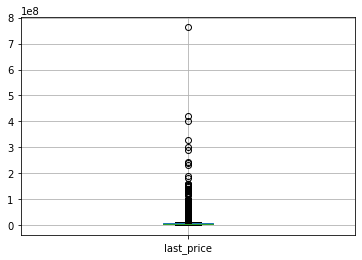

In [35]:
data[['last_price']].boxplot()

The diagram shows abnormal outliers in the values in the `last_price` column. Let's look at the top 5 most expensive real estate in the table and the typical sample values.

In [36]:
data.sort_values(by='last_price', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000,400.0,2017-09-30,7,3.0,10,250.0,10,True,...,NaN,2,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,True,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000,401.0,2016-02-20,5,3.2,9,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000,190.0,2018-04-04,3,3.5,7,95.0,5,True,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000,618.0,2017-12-18,7,3.4,7,258.0,5,True,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0


In [37]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

The arithmetic mean of the data set is ~2.000.000 greater than the median and the standard deviation is ~11.000.000, which indicates that there are serious anomalies and outliers in the data, which is what we see in the data. Apartments costing 300.000.000 with a median value of 4.650.000 are outstanding values, unique offers on the real estate market. Let's see how many rows with a sale price of more than 20.000.000 are in the dataset

In [38]:
initial_data_len = len(data)
price_limit = 20000000
print(f"Number of apartments worth more than 20.000.000: {len(data.query('last_price > @price_limit'))}")
print(f"Percentage of such apartments in the dataset: {len(data.query('last_price > @price_limit')) / len(data):.0%}")

Number of apartments worth more than 20.000.000: 707
Percentage of such apartments in the dataset: 3%


Remove such apartments from the dataset. Let's build a range diagram again and look at the characteristic values of the sample.

count    2.299200e+04
mean     5.423607e+06
std      3.220160e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.550000e+06
75%      6.500000e+06
max      2.000000e+07
Name: last_price, dtype: float64

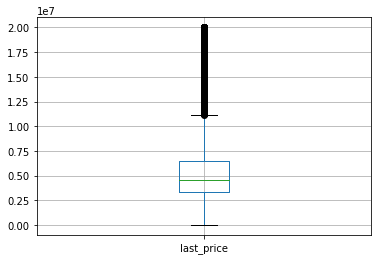

In [39]:
data = data.loc[data['last_price'] <= price_limit]
data[['last_price']].boxplot()
data['last_price'].describe()

The gap between the mean and median decreased by 2 times, and the standard deviation decreased by more than 3 times. Let's leave the data in the column as it is.

#### 3.4.2. Columns 'total_area', 'living_area', 'kitchen_area' <a id='areas'> </a>

Consider the range charts for the `total_area`, `living_area`, `kitchen_area` columns and the characteristic values of the `total_area` column.

count    22992.000000
mean        56.734944
std         24.810262
min         12.000000
25%         40.000000
50%         51.000000
75%         67.105000
max        460.800000
Name: total_area, dtype: float64

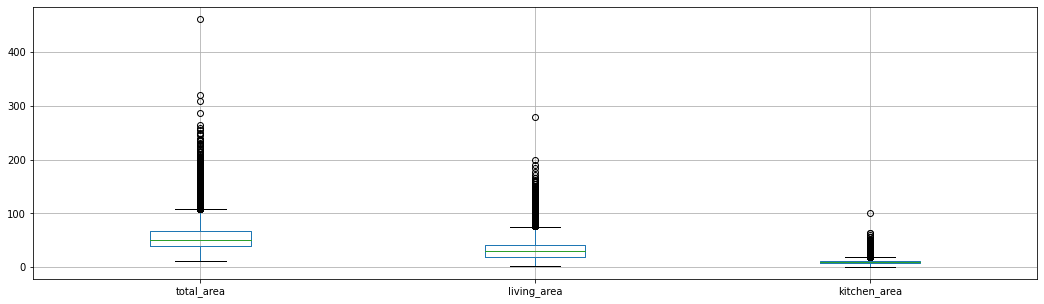

In [40]:
data[['total_area', 'living_area', 'kitchen_area']].boxplot(figsize=(18, 5))
data['total_area'].describe()

There are outliers in the 'total_area' column that affect the data set.
Let's see how many apartments in the sample have an area of more than 200 sq.m and remove them. Let's build range charts again and see how they have changed for the columns `total_area`, `living_area`, `kitchen_area`.

Number of apartments over 200 sq.m.: 42
Percentage of such apartments in the dataset: 0.2%


count    22950.000000
mean        56.409019
std         23.555763
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        200.000000
Name: total_area, dtype: float64

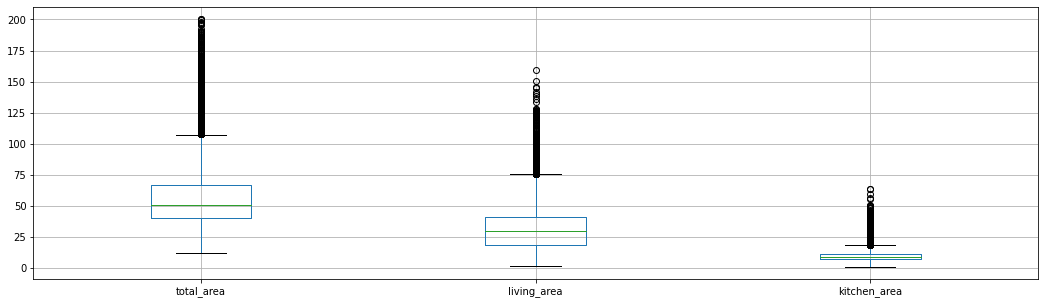

In [41]:
total_area_limit = 200
print(f"Number of apartments over 200 sq.m.: {len(data.query('total_area > @total_area_limit'))}")
print(f"Percentage of such apartments in the dataset: {len(data.query('total_area > @total_area_limit')) / len(data):.1%}")
data = data.loc[data['total_area'] <= total_area_limit]
data[['total_area', 'living_area', 'kitchen_area']].boxplot(figsize=(18, 5))
data['total_area'].describe()

For the `living_area` and `kitchen_area` columns, we will also remove outliers. Apartments with a living area of more than 80 sq.m and a kitchen area of more than 20 sq.m are rare, so we will leave objects with a living area of less than 80 sq.m and a kitchen area of less than 20 sq.m in the data set. Let's display characteristic values and range charts for the columns.

Number of apartments with living area over 80 sq.m: 310
Number of apartments with a kitchen area of more than 20 sq.m: 669
Percentage of such apartments in the datasetх: 4.1%


,total_area,living_area,kitchen_area
count,22016.000000,20243.000000,19839.000000
mean,54.246574,31.137555,9.452901
std,20.144645,13.701548,3.141525
min,12.000000,2.000000,1.300000
25%,39.000000,18.200000,7.000000
50%,50.000000,29.700000,9.000000
75%,65.000000,40.000000,11.000000
max,199.200000,80.000000,20.000000


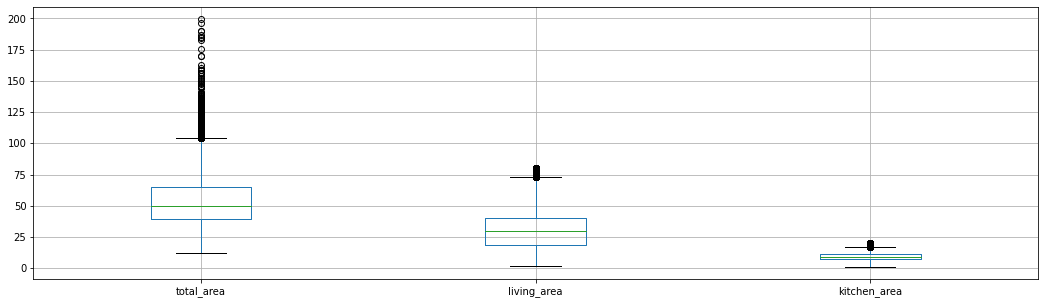

In [42]:
living_area_limit = 80
kitchen_area_limit = 20
print(f"Number of apartments with living area over 80 sq.m: \
{len(data.query('living_area > @living_area_limit'))}")
print(f"Number of apartments with a kitchen area of more than 20 sq.m: \
{len(data.query('kitchen_area > @kitchen_area_limit'))}")
print(f"Percentage of such apartments in the datasetх: \
{len(data.query('living_area > @living_area_limit or kitchen_area > @kitchen_area_limit')) / len(data):.1%}")
data = data.drop(data[data.living_area > living_area_limit].index)
data = data.drop(data[data.kitchen_area > kitchen_area_limit].index)
data[['total_area', 'living_area', 'kitchen_area']].boxplot(figsize=(18, 5))
data[['total_area', 'living_area', 'kitchen_area']].describe()

We have eliminated rare and outlier values in the `total_area`, `living_area`, `kitchen_area` columns. Now in these columns, the mean and median are close, and the standard deviation is small, and the data is ready for further analysis.

#### 3.4.3. Columns 'floors_total', 'floor', 'rooms', 'balcony' <a id='floors'> </a>  

Let's build range charts and display characteristic values for the columns `floors_total`, `floor`, `rooms`, `balcony`.

,floors_total,floor,rooms,balcony
count,22016.000000,22016.000000,22016.000000,22016.000000
mean,10.736237,5.903434,1.953261,0.594204
std,6.645753,4.900447,0.916424,0.950958
min,0.000000,1.000000,0.000000,0.000000
25%,5.000000,2.000000,1.000000,0.000000
50%,9.000000,4.000000,2.000000,0.000000
75%,16.000000,8.000000,3.000000,1.000000
max,60.000000,33.000000,7.000000,5.000000


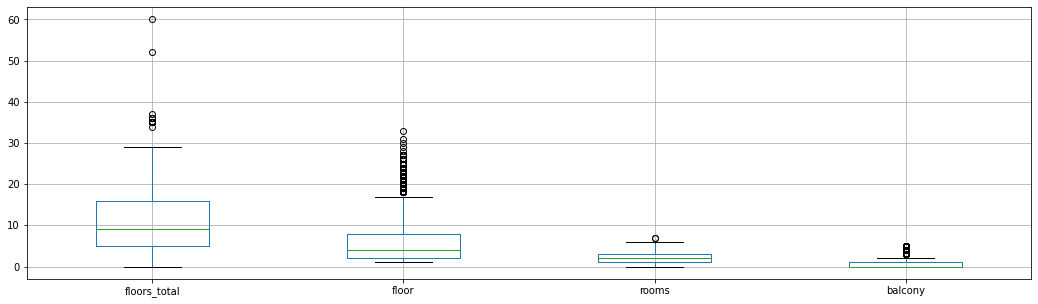

In [43]:
data[['floors_total', 'floor', 'rooms', 'balcony']].boxplot(figsize=(18, 5))
data[['floors_total', 'floor', 'rooms', 'balcony']].describe()

We remove from the sample objects with a total number of floors and a floor above 30 and the number of balconies more than 2, since these are extremely rare phenomena for St. Petersburg. Let's display characteristic values and range diagrams again. We will not touch the `rooms` column, since it does not contain anomalous values.

Number of apartments in a building with more than 30 storeys: 25
Number of apartments with more than 2 balconies: 487
Percentage of such apartments in the dataset: 2.3%


,floors_total,floor,balcony
count,21505.000000,21505.000000,21505.000000
mean,10.664776,5.859521,0.507510
std,6.585922,4.864116,0.757988
min,0.000000,1.000000,0.000000
25%,5.000000,2.000000,0.000000
50%,9.000000,4.000000,0.000000
75%,16.000000,8.000000,1.000000
max,29.000000,27.000000,2.000000


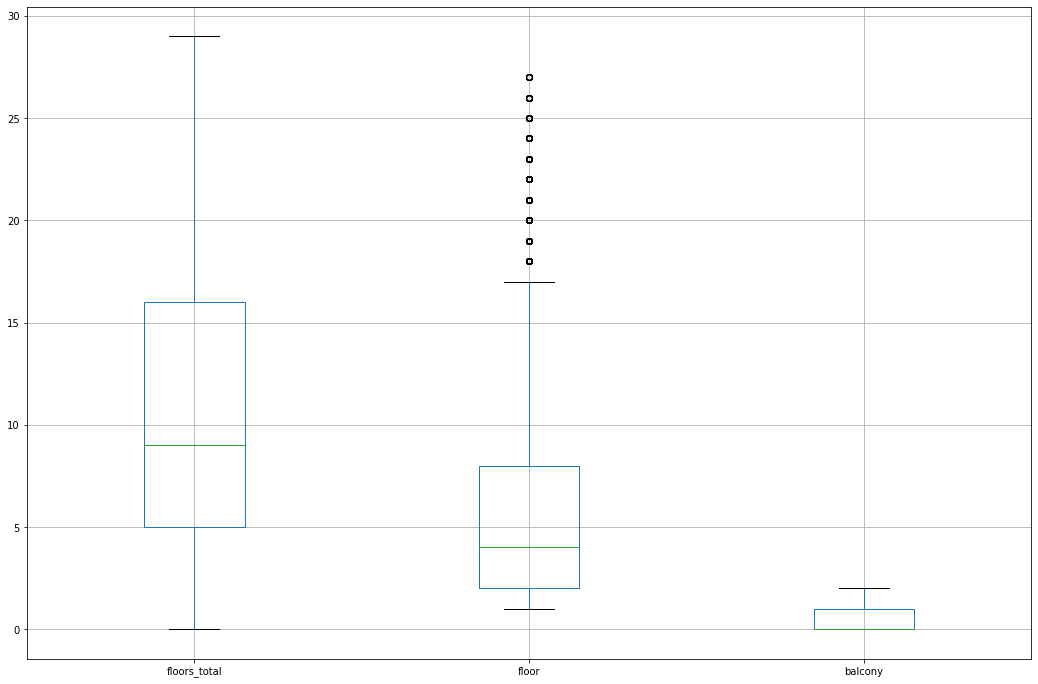

In [44]:
floor_limit = 30
balcony_limit = 2
print(f"Number of apartments in a building with more than 30 storeys: \
{len(data.query('floors_total > @floor_limit or floor > @floor_limit'))}")
print(f"Number of apartments with more than 2 balconies: \
{len(data.query('balcony > @balcony_limit'))}")
print(f"Percentage of such apartments in the dataset: \
{len(data.query('floors_total > @floor_limit or floor > @floor_limit or balcony > @balcony_limit')) / len(data):.1%}")
data = data.drop(data[data.floors_total > floor_limit].index)
data = data.loc[data['floor'] <= floor_limit]
data = data.drop(data[data.balcony > balcony_limit].index)
data[['floors_total', 'floor', 'balcony']].boxplot(figsize=(18, 12))
data[['floors_total', 'floor', 'balcony']].describe()

The characteristic values of the `floors_total`, `floor` and `balcony` columns have changed slightly for the better. Let's leave the data as it is.

#### 3.4.4. Column 'total_images' <a id='total_images'> </a>  

,total_images
count,21505.000000
mean,9.683562
std,5.560901
min,0.000000
25%,6.000000
50%,9.000000
75%,14.000000
max,39.000000


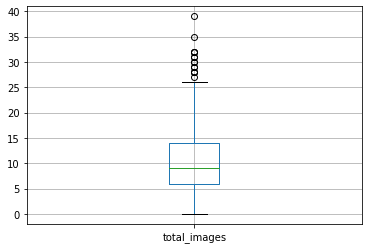

In [45]:
data[['total_images']].boxplot()
data[['total_images']].describe()

The median and arithmetic mean are very close. Minor emissions are not affected. Let's leave the column unchanged.

#### 3.4.5. Column 'days_exposition' <a id='days_exposition'> </a>

,days_exposition
count,18839.000000
mean,174.749987
std,213.769181
min,1.000000
25%,44.000000
50%,92.000000
75%,221.000000
max,1553.000000


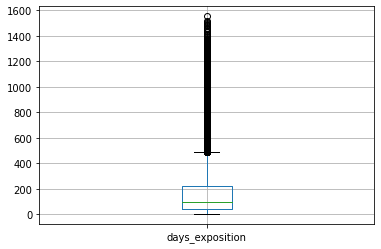

In [46]:
data[['days_exposition']].boxplot()
data[['days_exposition']].describe()

The mean is almost twice the median, and the standard deviation is very large. There is a lot of anomalous data in the column. Let's study their nature.

In [47]:
data.query('days_exposition > 500').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
17,6,4180000,36.0,2016-09-09,1,NaN,17,16.5,7,True,...,11.0,1,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0
23,11,2950000,32.0,2016-10-29,1,2.6,9,17.7,9,True,...,6.1,0,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0
43,13,9330000,48.0,2017-01-10,2,3.0,4,28.0,4,True,...,7.5,0,Санкт-Петербург,15016.0,10822.0,0.0,NaN,1.0,492.0,763.0
61,18,7990000,74.0,2017-08-24,2,NaN,4,43.0,4,True,...,20.0,0,Санкт-Петербург,22568.0,4288.0,1.0,363.0,0.0,NaN,609.0


There is nothing unusual in the data, except for the long ad placement period. Most likely, this is due to the fact that the seller did not remove the announcement of the sale immediately after the transaction and do not reflect the real term for the sale of the apartment. Let's remove from the dataframe all rows with an ad placement period of more than 1 year.

The number of ads with a placement period of more than 1 year:     2650
Percentage of such apartments in the dataset:     12.3%


,days_exposition
count,16189.000000
mean,103.274199
std,88.913570
min,1.000000
25%,36.000000
50%,72.000000
75%,151.000000
max,364.000000


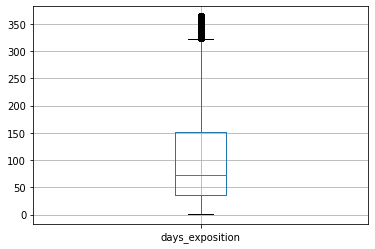

In [48]:
days_exposition_limit = 365
print(f"The number of ads with a placement period of more than 1 year: \
    {len(data.query('days_exposition > @days_exposition_limit'))}")
print(f"Percentage of such apartments in the dataset: \
    {len(data.query('days_exposition > @days_exposition_limit')) / len(data):.1%}")
data_filtered = data.drop(data[data.days_exposition > days_exposition_limit].index)
data_filtered[['days_exposition']].boxplot()
display(data_filtered[['days_exposition']].describe())

The characteristic values of the dataset improved, but we lost 12% of the data, which is unacceptable. Most likely, our hypothesis that people do not remove the announcement of the sale is not correct. Let's take a closer look at the data in the `days_exposition` column. Let's build a histogram.

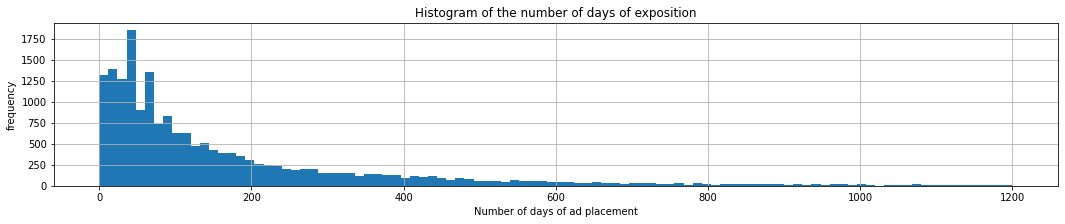

In [49]:
gr = data['days_exposition'].hist(bins=100, range=(0, 1200), figsize=(18, 3))
gr.set_title('Histogram of the number of days of exposition')
gr.set_xlabel('Number of days of ad placement')
gr.set_ylabel('frequency');

The histogram looks normal, but there are strange peaks in the first 150 days. Let's take a closer look at them.

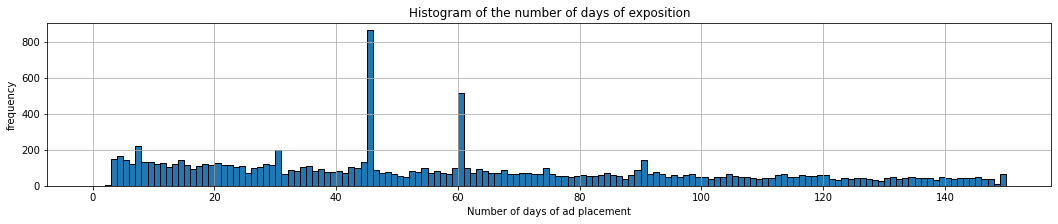

In [50]:
gr = data['days_exposition'].hist(bins=150, range=(0, 150), figsize=(18, 3), ec='black')
gr.set_title('Histogram of the number of days of exposition')
gr.set_xlabel('Number of days of ad placement')
gr.set_ylabel('frequency');

There is a strong peak on the removal of ads on the 45th day, a smaller peak on the 60th day. There are also almost identical smaller peaks on the 7th and 30th day. The Yandex.Realty website (https://yandex.ru/support/realty/owner/home/add-ads-housing.html#concept_ohg_pft_flb) indicates the following terms for publishing free ads for the sale of an apartment:
- up to 4.5 million - 45 days
- from 4.5 to 10 million - 60 days
- from 10 million - 90 days

As we have already seen in the range diagram of the `last_price` column with prices for apartments, the largest number of ads belong to the price range from 4 to 6 million rubles. Accordingly, the ad removal peaks on the 45th and 60th days are associated with the automatic removal of the ad by the service, that is, they do not reflect the actual sale date. Rows with `days_exposition` column values ​​of 45 and 60 should be deleted, or filled with the median value of publication dates. But since the data has a wide range and a large number of anomalously large values ​​of an unclear nature, it would be more correct to remove a slice of this data so that it does not distort the picture of real sales times, and see what happens.

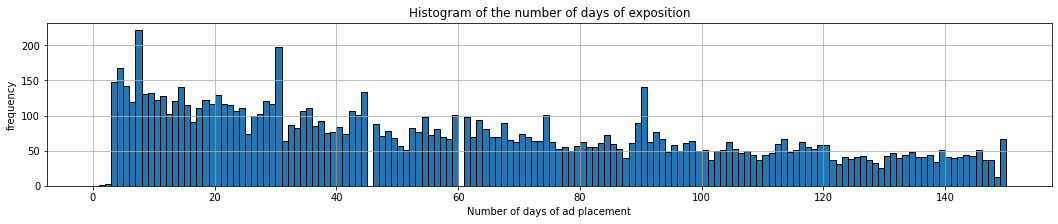

In [51]:
data = data.loc[data['days_exposition'] != 45.00000000000001]
data = data.loc[data['days_exposition'] != 60]
gr = data['days_exposition'].hist(bins=150, range=(0, 150), figsize=(18, 3), ec='black')
gr.set_title('Histogram of the number of days of exposition')
gr.set_xlabel('Number of days of ad placement')
gr.set_ylabel('frequency');

Ads automatically removed on day 45 and day 60 were removed from the data set. No explanation was found for the ad removal peaks on the 7th and 30th day.

#### 3.4.6. Columns 'airports_nearest', 'cityCenters_nearest' <a id='airports'> </a> 

Let's build range charts and display characteristic values for these columns.

,airports_nearest,cityCenters_nearest
count,15331.000000,15347.000000
mean,28792.607788,14630.839643
std,12866.048867,8516.692324
min,6450.000000,208.000000
25%,18090.000000,10186.000000
50%,26832.000000,13355.000000
75%,37434.000000,16478.000000
max,84869.000000,65968.000000


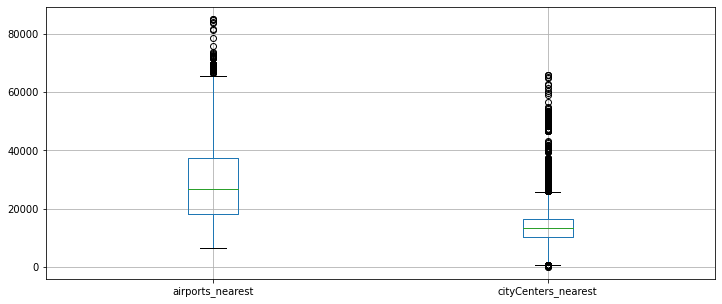

In [52]:
data[['airports_nearest', 'cityCenters_nearest']].boxplot(figsize=(12, 5))
data[['airports_nearest', 'cityCenters_nearest']].describe()

The arithmetic mean and median are close. Let's leave this data unchanged.

#### 3.4.7. Columns 'parks_nearest', 'ponds_nearest' <a id='parks'> </a>

Let's build range charts and display characteristic values for these columns.

,parks_nearest,ponds_nearest
count,6580.000000,7447.000000
mean,493.923252,527.832819
std,340.006336,275.861282
min,1.000000,13.000000
25%,292.000000,311.000000
50%,458.000000,513.000000
75%,615.000000,733.000000
max,3190.000000,1344.000000


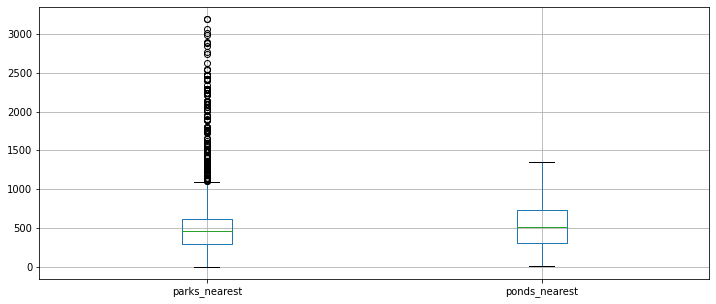

In [53]:
data[['parks_nearest', 'ponds_nearest']].boxplot(figsize=(12, 5))
data[['parks_nearest', 'ponds_nearest']].describe()

There is nothing unusual in these data either. Let's leave them unchanged.

#### 3.4.8. Columns 'parks_around3000', 'ponds_around3000' <a id='parks3000'> </a> 

Let's build range charts and display characteristic values for these columns.

,parks_around3000,ponds_around3000
count,15348.000000,15348.000000
mean,0.576753,0.724133
std,0.774613,0.903573
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,3.000000,3.000000


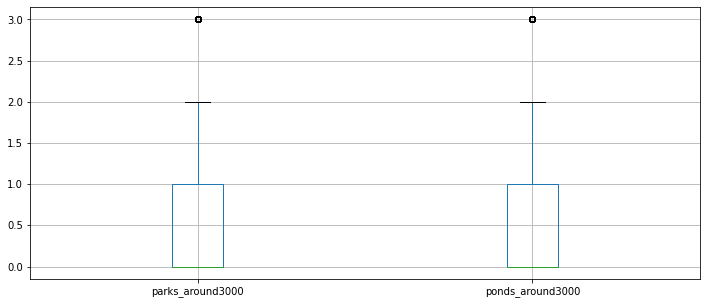

In [54]:
data[['parks_around3000', 'ponds_around3000']].boxplot(figsize=(12, 5))
data[['parks_around3000', 'ponds_around3000']].describe()

The range charts have an outlier of value 3 in both columns. I wonder how many of these apartments, where within a radius of 3 km there are 3 parks, 3 ponds, or both.

In [55]:
print(f"Number of apartments with 3 parks within a radius of 3 km: {len(data.query('parks_around3000 == 3'))}")
print(f"Number of apartments with 3 ponds within a radius of 3 km: {len(data.query('ponds_around3000 == 3'))}")
print(f"Number of apartments with 3 parks and ponds within a radius of 3 km: {len(data.query('parks_around3000 == 3 and ponds_around3000 == 3'))}")

Number of apartments with 3 parks within a radius of 3 km: 455
Number of apartments with 3 ponds within a radius of 3 km: 1065
Number of apartments with 3 parks and ponds within a radius of 3 km: 162


There is nothing unusual in these data, it is quite possible. Let's leave this data unchanged.

#### 3.4.9. Column 'first_day_exposition' <a id='first_day_exposition'> </a> 

Let's check that there are no anomalous date values in the `first_day_exposition` column, for example, from the distant past or future. Let's display the maximum and minimum values of the date range.

In [56]:
print(f"Minimum value in 'first_day_exposition' column: {data['first_day_exposition'].unique().min()}")
print(f"Max value in 'first_day_exposition' column: {data['first_day_exposition'].unique().max()}")

Minimum value in 'first_day_exposition' column: 2014-11-27T00:00:00.000000000
Max value in 'first_day_exposition' column: 2019-05-03T00:00:00.000000000


The data in this column is in perfect order.

#### 3.4.10. Column 'ceiling_height' <a id='ceiling_height'> </a>

Let's display the span charts and characteristic values of the `ceiling height` column.

,ceiling_height
count,12985.000000
mean,2.736062
std,0.942418
min,1.000000
25%,2.500000
50%,2.640000
75%,2.770000
max,32.000000


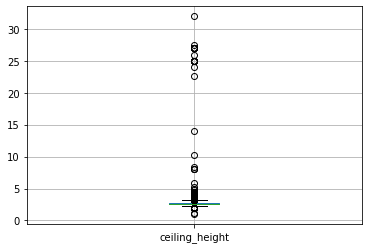

In [57]:
data[['ceiling_height']].boxplot()
data[['ceiling_height']].describe()

The data contains anomalous ceiling heights. We will display a list of all knowledge and sort it from largest to smallest

In [58]:
print(sorted(data['ceiling_height'].unique(), reverse=True))

[nan, 32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6, 14.0, 10.3, 8.3, 8.0, 5.8, 5.3, 5.0, 4.8, 4.5, 4.4, 4.37, 4.3, 4.25, 4.2, 4.19, 4.15, 4.14, 4.1, 4.06, 4.0, 3.98, 3.95, 3.93, 3.9, 3.88, 3.85, 3.84, 3.8, 3.78, 3.75, 3.7, 3.67, 3.66, 3.65, 3.63, 3.62, 3.6, 3.59, 3.57, 3.56, 3.55, 3.54, 3.53, 3.52, 3.5, 3.49, 3.48, 3.47, 3.46, 3.45, 3.44, 3.42, 3.4, 3.39, 3.38, 3.37, 3.36, 3.35, 3.34, 3.33, 3.32, 3.31, 3.3, 3.29, 3.28, 3.27, 3.26, 3.25, 3.24, 3.23, 3.22, 3.21, 3.2, 3.18, 3.17, 3.16, 3.15, 3.14, 3.13, 3.12, 3.11, 3.1, 3.09, 3.08, 3.07, 3.06, 3.05, 3.04, 3.03, 3.02, 3.01, 3.0, 2.99, 2.98, 2.97, 2.96, 2.95, 2.94, 2.93, 2.92, 2.91, 2.9, 2.89, 2.88, 2.87, 2.86, 2.85, 2.84, 2.83, 2.82, 2.81, 2.8, 2.79, 2.78, 2.77, 2.76, 2.75, 2.74, 2.73, 2.72, 2.71, 2.7, 2.69, 2.68, 2.67, 2.66, 2.65, 2.64, 2.63, 2.62, 2.61, 2.6, 2.59, 2.58, 2.57, 2.56, 2.55, 2.54, 2.53, 2.52, 2.51, 2.5, 2.49, 2.48, 2.47, 2.46, 2.45, 2.4, 2.3, 2.0, 1.2, 1.0]


Ceiling heights ranging from 2 to 8.3 meters look realistic. We will not touch them. Let's look at objects that have a ceiling height of 1, 1.2, 10.3, 14 meters.

In [59]:
data.query('ceiling_height in [1, 1.2, 10.3, 14]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14,2,1.2,2,27.5,1,True,...,5.2,0,посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
15061,19,5600000,56.4,2018-05-11,2,14.0,14,32.4,5,True,...,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22309,20,5300000,45.0,2017-09-30,1,10.3,16,15.5,15,True,...,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22590,16,6000000,55.0,2018-10-31,2,1.0,12,32.4,7,True,...,10.0,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


An apartment in the village of Mga on the 1st floor with a ceiling height of 1.2 meters looks like an anomaly. Let's remove the row with this value from the dataset.

In [60]:
data = data.loc[data['ceiling_height'] != 1.2]

An apartment in St. Petersburg on the 5th floor of a 14-storey building with a ceiling height of 14 meters hardly exists. Most likely, the seller mistakenly entered the number of floors in the ceiling height field, since these values ​​are the same. Let's see if there are other apartments for sale in the same building. Find other objects with the same distance to the city center `cityCenters_nearest` = 13610 and the airport `airports_nearest` = 14814.

In [61]:
data.query('cityCenters_nearest == 13610 and airports_nearest == 14814')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000,56.4,2018-05-11,2,14.0,14,32.4,5,True,...,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
18484,9,5500000,50.5,2018-02-26,2,NaN,15,31.0,14,True,...,8.0,0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,32.0


Great, looks like there's another apartment for sale in the same building. The available cartographic data are completely consistent. But unfortunately, the seller of the object did not indicate the height of the ceilings, so we still do not know how high the ceilings are in this house. Let's remove the row with the value `ceiling_height` = 14 from the dataframe.

In [62]:
data = data.loc[data['ceiling_height'] != 14]

An apartment in St. Petersburg worth 6.000.000, an area of 55 sq.m. on the seventh floor of a 12-storey building with a ceiling height of 1 meter is also unlikely to exist. More like a typing error. Let's check if other apartments in the same building are for sale.

In [63]:
data.query('cityCenters_nearest == 14217 and airports_nearest == 33053')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10378,9,6500000,78.0,2017-08-29,3,2.7,12,48.0,6,False,...,15.0,1,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,97.0
15420,8,4500000,38.6,2019-03-31,1,2.7,12,20.1,2,False,...,10.1,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,29.0
22590,16,6000000,55.0,2018-10-31,2,1.0,12,32.4,7,True,...,10.0,0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


The data set contains advertisements for the sale of two more apartments in the same building, and one advertisement indicates the height of the ceilings - 2.7 m. Let's replace the incorrect ceiling height value of 1 m with 2.7 meters.

In [64]:
data['ceiling_height'] = data['ceiling_height'].replace(1, 2.7)

We will do the same for an apartment with a ceiling height of 10.3 m.

In [65]:
data.query('cityCenters_nearest == 11936 and airports_nearest == 36353')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1207,14,7300000,70.2,2016-03-23,2,2.77,16,38.0,12,False,...,11.0,2,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,553.0
10772,8,5200000,41.0,2018-08-28,1,2.80,16,18.0,7,True,...,10.0,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,13.0
12770,8,5300000,47.0,2017-06-28,1,2.80,16,20.0,4,True,...,10.5,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,135.0
16892,16,7850000,52.0,2018-08-29,1,2.50,15,20.2,13,True,...,14.6,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,NaN
19351,14,8700000,69.0,2016-03-30,2,2.77,16,37.0,11,True,...,10.0,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,276.0
19531,18,8600000,73.0,2018-11-21,2,2.75,16,41.0,2,True,...,11.0,2,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,105.0
20142,16,5300000,45.8,2017-10-25,1,2.77,16,20.2,9,True,...,10.4,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,29.0
22309,20,5300000,45.0,2017-09-30,1,10.30,16,15.5,15,True,...,NaN,0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0


Data on the height of the ceiling in the same house is different. This is strange. The value of 2.8 m seems quite realistic. Let's replace the incorrect value of the ceiling height of 10.3 m with 2.8 meters.

In [66]:
data['ceiling_height'] = data['ceiling_height'].replace(10.3, 2.8)

Now consider the remaining anomalously large ceiling heights in the range of values from 22.6 to 32 meters. Let's test the hypothesis that the seller did not put a dot between two numbers or put it in the wrong place in the number. Let's see if there are ads for the sale of apartments in the same buildings, where abnormally high ceilings are indicated.

In [67]:
for ceiling_height in [32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6]:
    display(data.loc[(data['cityCenters_nearest'] == data.loc[data['ceiling_height'] == ceiling_height, 'cityCenters_nearest'].reset_index(drop=True)[0]) &
            (data['airports_nearest'] == data.loc[data['ceiling_height'] == ceiling_height, 'airports_nearest'].reset_index(drop=True)[0])])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4088,10,4500000,39.0,2018-04-02,1,NaN,26,17.00,7,True,...,9.00,0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,180.0
13951,10,4900000,36.5,2018-10-10,1,2.75,24,11.47,23,True,...,15.90,0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,24.0
16114,16,6490000,57.0,2018-06-29,2,NaN,25,28.30,13,False,...,9.16,2,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,41.0
21110,20,6690000,54.0,2018-09-10,2,NaN,24,30.00,18,True,...,11.00,0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,139.0
21377,19,4900000,42.0,2017-04-18,1,27.50,24,37.70,19,False,...,11.00,2,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,True,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12247,10,7800000,75.61,2018-04-04,3,NaN,14,45.82,1,True,...,9.77,0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,277.0
20507,12,5950000,60.00,2018-02-19,2,22.6,14,35.00,11,True,...,13.00,1,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0


Hurray, in the building with the apartment, where the ceiling height is 27.5 meters, other apartments are also for sale, and in one of them the height is 2.75 meters. The hypothesis that the seller put a dot in the wrong number is confirmed. Let's replace the values 32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6 with 3.20, 2.75, 2.70, 2.60, 2.50, 2.40, 2.26 respectively.

In [68]:
def replace_ceiling_height(ceiling_height):
    if ceiling_height in [32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6]:
        return ceiling_height / 10
    return ceiling_height
data['ceiling_height'] = data['ceiling_height'].apply(replace_ceiling_height)

Let's check how the range diagram and characteristic values for the `ceiling_height` column have changed.

,ceiling_height
count,12983.000000
mean,2.700476
std,0.260107
min,2.000000
25%,2.500000
50%,2.640000
75%,2.770000
max,8.300000


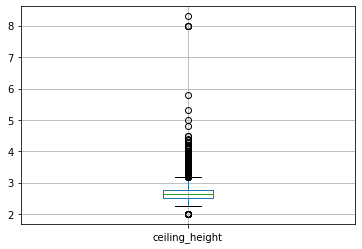

In [69]:
data[['ceiling_height']].boxplot()
data[['ceiling_height']].describe()

Great, the median and mean have converged, and the standard deviation has decreased by a factor of 3.75.

#### 3.4.11. Conclusions  <a id='conclusions_3_4'> </a> 

In [70]:
print(f'As a result of processing anomalous values, it was removed {initial_data_len - len(data)} rows from the dataframe, \
what is {(initial_data_len - len(data)) / initial_data_len:.1%} from the original dataset')

As a result of processing anomalous values, it was removed 3576 rows from the dataframe, what is 15.1% from the original dataset


The data in the tables was processed as follows:
- removed data about apartments:  
    * worth > 20.000.000 rubles (column `last_price`, 707 rows deleted);  
    * total area > 200 sq.m (column `total_area`, 42 rows deleted);  
    * with living area > 80 sq.m. (column `living_area`, 3 lines removed);  
    * with kitchen area > 20 sq.m. (column `kitchen_area`, 425 rows removed);  
    * in buildings with more than 30 storeys (columns `floors_total`, `floor`, 22 lines deleted);  
    * with more than 2 balconies (column `balcony`, 450 rows deleted);  
    * with an ad placement period of 45 and 60 days (column `days_exposition`, line 1370 deleted);  
    * with a ceiling height of 1.2 and 14 m (column `ceiling_height`, 2 lines removed);  
- replaced data on apartments:
    * with a ceiling height of 32.0, 27.5, 27.0, 26.0, 25.0, 24.0, 22.6 by 3.20, 2.75, 2.70, 2.60, 2.50, 2.40, 2.26 respectively (`ceiling_height` column).

Indicators about the number of ads in the dataset, minimum and maximum indicators in the selected parameters for the sale of apartments.

In [71]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor',
       'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"20,123.00","20,123.00","12,983.00","17,457.00","20,123.00","18,894.00","18,481.00","20,123.00","20,123.00"
min,0.00,12.00,2.00,1.00,"430,000.00",2.00,1.30,1.00,0.00
max,7.00,199.20,8.30,"1,553.00","20,000,000.00",80.00,20.00,27.00,28.00


In [72]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20123 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20123 non-null  int64         
 1   last_price            20123 non-null  int64         
 2   total_area            20123 non-null  float64       
 3   first_day_exposition  20123 non-null  datetime64[ns]
 4   rooms                 20123 non-null  int64         
 5   ceiling_height        12983 non-null  float64       
 6   floors_total          20123 non-null  int64         
 7   living_area           18894 non-null  float64       
 8   floor                 20123 non-null  int64         
 9   is_apartment          20123 non-null  bool          
 10  studio                20123 non-null  bool          
 11  open_plan             20123 non-null  bool          
 12  kitchen_area          18481 non-null  float64       
 13  balcony         

### 3.5. Adding new columns <a id='add_new_columns'> </a>

* Add a column with the price of one square meter of an apartment

In [73]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype(int)

* Add a column with the day of the week the announcement was published (0 - Monday, 1 - Tuesday, and so on)

In [74]:
data['first_wkday_exposition'] = data['first_day_exposition'].dt.weekday

* Add a column with the month of publication of the announcement

In [75]:
data['first_month_exposition'] = data['first_day_exposition'].dt.month

* Add a column with the month of publication of the announcement

In [76]:
data['first_year_exposition'] = data['first_day_exposition'].dt.year

* Add a column with the floor type of the apartment (values - "first", "last", "other")

In [77]:
def add_floor_type(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'
data['floor_type'] = data.apply(add_floor_type, axis=1)

* Add a column with the distance to the city center in kilometers

In [78]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

**Result:** check for new columns in the table

In [79]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,first_wkday_exposition,first_month_exposition,first_year_exposition,floor_type,cityCenters_nearest_km
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,True,...,NaN,0.0,NaN,81.0,82920,1,12,2018,first,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,90.0,2.0,574.0,558.0,92785,3,8,2015,other,14.0
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,True,...,NaN,NaN,NaN,55.0,95065,0,9,2018,other,NaN
6,6,3700000,37.3,2017-11-02,1,NaN,26,10.6,6,True,...,NaN,0.0,NaN,155.0,99195,3,11,2017,other,19.0
7,5,7915000,71.6,2019-04-18,2,NaN,24,NaN,22,True,...,NaN,0.0,NaN,NaN,110544,3,4,2019,other,12.0


## 4. Exploratory data analysis <a id='research'> </a>

### 4.1. Examining object parameters <a id='parameters'> </a>

#### 4.1.1. Total area <a id='par_total_area'> </a>

count    20123.000000
mean        54.066265
std         20.214610
min         12.000000
25%         39.000000
50%         49.700000
75%         64.615000
max        199.200000
Name: total_area, dtype: float64

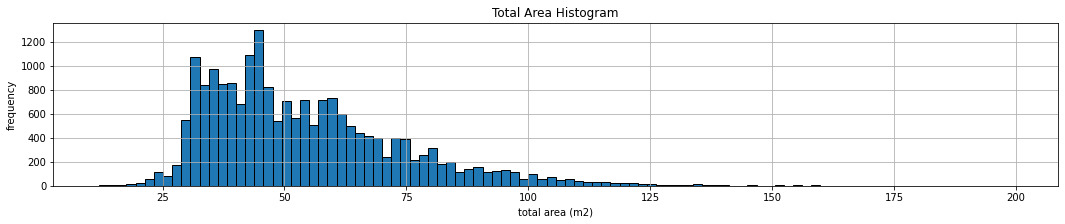

In [80]:
display(data['total_area'].describe())
gr = data['total_area'].hist(bins=100, ec='black', figsize=(18, 3))
gr.set_title('Total Area Histogram')
gr.set_xlabel('total area (m2)')
gr.set_ylabel('frequency');

The total area in our sample ranges from 12 to 200 sq.m., with a mean of 48 and a median of 51 sq.m. Most offers for apartments with a total area of 30 to 45 square meters. m. Further, with an increase in the area, the number of proposals decreases. The distribution of values is close to normal.

#### 4.1.2. Living area <a id='par_living_area'> </a> 

count    18894.000000
mean        30.984033
std         13.699757
min          2.000000
25%         18.100000
50%         29.500000
75%         40.000000
max         80.000000
Name: living_area, dtype: float64

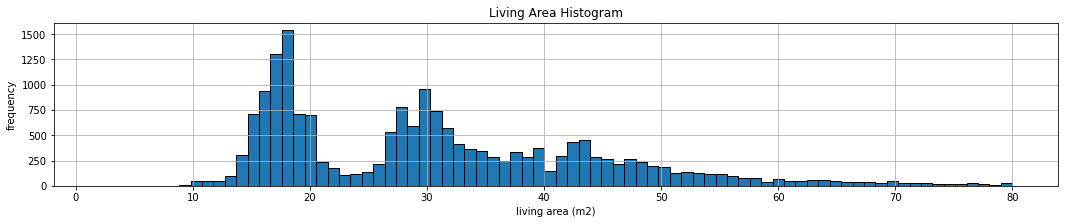

In [81]:
display(data['living_area'].describe())
gr = data['living_area'].hist(bins=80, ec='black', figsize=(18, 3))
gr.set_title('Living Area Histogram')
gr.set_xlabel('living area (m2)')
gr.set_ylabel('frequency');

The distribution of living space values has several peaks: two ranges are clearly expressed. Most apartments with a living area in the range of 16-18 sq.m and 27-33 sq.m. The distribution seems to consist of three normal distributions. This is probably due to the different types of buildings.

#### 4.1.3. Kitchen area <a id='par_kitchen_area'> </a>

count    18481.000000
mean         9.414047
std          3.130125
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         20.000000
Name: kitchen_area, dtype: float64

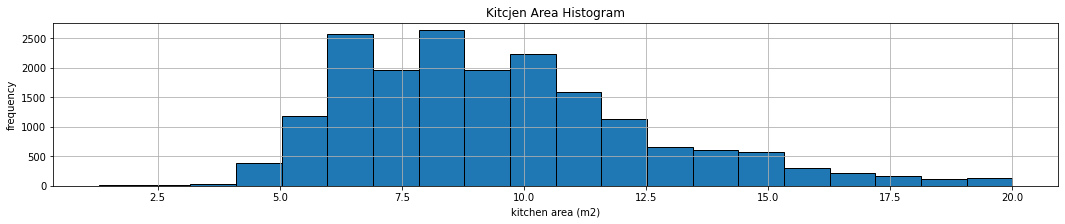

In [82]:
display(data['kitchen_area'].describe())
gr = data['kitchen_area'].hist(bins=20, ec='black', figsize=(18, 3))
gr.set_title('Kitcjen Area Histogram')
gr.set_xlabel('kitchen area (m2)')
gr.set_ylabel('frequency');

The area of the kitchen has a normal distribution of values. The average value for the sample is 9 sq.m.

#### 4.1.4. Apartment price <a id='par_last_price'> </a>

count    2.012300e+04
mean     5.148109e+06
std      2.842613e+06
min      4.300000e+05
25%      3.350000e+06
50%      4.495000e+06
75%      6.200000e+06
max      2.000000e+07
Name: last_price, dtype: float64

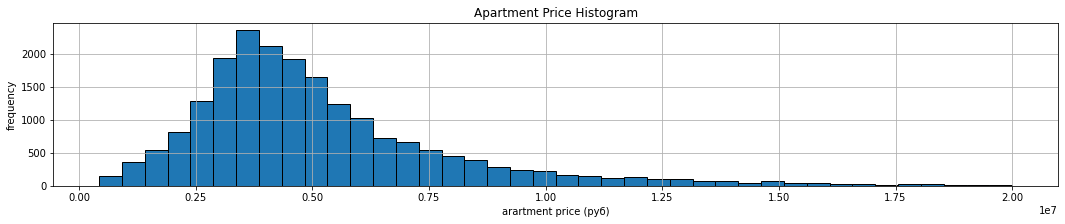

In [83]:
display(data['last_price'].describe())
gr = data['last_price'].hist(bins=40, ec='black', figsize=(18, 3))
gr.set_title('Apartment Price Histogram')
gr.set_xlabel('arartment price (руб)')
gr.set_ylabel('frequency');

The price of an object has a normal distribution of values. Most values are between 3 and 6 million.

#### 4.1.5. Number of rooms <a id='par_rooms'> </a>

count    20123.00000
mean         1.94638
std          0.91805
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          7.00000
Name: rooms, dtype: float64

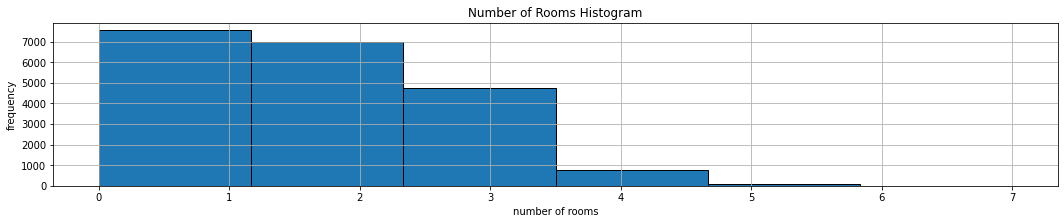

In [84]:
display(data['rooms'].describe())
gr = data['rooms'].hist(bins=6, ec='black', figsize=(18, 3))
gr.set_title('Number of Rooms Histogram')
gr.set_xlabel('number of rooms')
gr.set_ylabel('frequency');

In [85]:
studio_data = data.pivot_table(index='rooms', values='studio', aggfunc=['count', 'sum', 'mean'])
studio_data.index.name = 'number of rooms'
studio_data.columns = ['number of apartments', 'number of studio', 'share of studios']
studio_data['share of studios'] = studio_data['share of studios'].round(3)
studio_data

,number of apartments,number of studio,share of studios
number of rooms,,,
0,180,133,0.739
1,7357,6,0.001
2,6957,0,0.000
3,4746,0,0.000
4,771,0,0.000
5,100,0,0.000
6,10,0,0.000
7,2,0,0.000


There are 180 apartments in the dataframe with 0 rooms, 133 of them are studios. Most likely all these objects are studios. It can be seen from the pivot table that there is no tendency to call studios 1-room apartments (only 6 values out of 7352). So very few studios are put up for sale. Apparently, they are bought at the construction stage and kept in the property for rent. Most offers for the sale of 1-room, 2-room apartments and 3-room apartments. As the number of rooms increases, the number of ads decreases.

#### 4.1.6. Ceiling height <a id='par_ceiling_height'> </a>

count    12983.000000
mean         2.700476
std          0.260107
min          2.000000
25%          2.500000
50%          2.640000
75%          2.770000
max          8.300000
Name: ceiling_height, dtype: float64

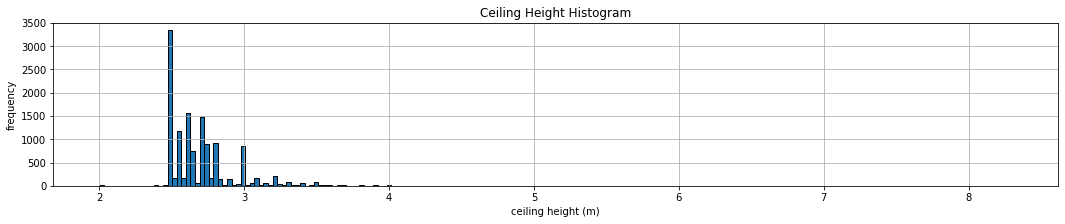

In [86]:
display(data['ceiling_height'].describe())
gr = data['ceiling_height'].hist(bins=200, ec='black', figsize=(18, 3))
gr.set_title('Ceiling Height Histogram')
gr.set_xlabel('ceiling height (m)')
gr.set_ylabel('frequency');

The average ceiling height is 2.6 meters. The minimum height is 1.2 m, the maximum is 8.3 m. The data is quite realistic.

#### 4.1.7. Apartment floor <a id='par_floor'> </a>

count    20123.000000
mean         5.849128
std          4.843346
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

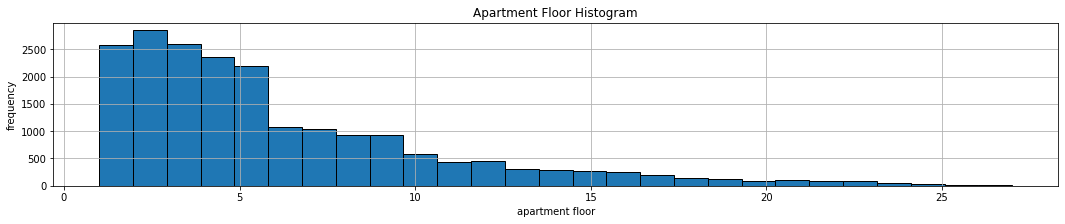

In [87]:
display(data['floor'].describe())
gr = data['floor'].hist(bins=27, ec='black', figsize=(18, 3))
gr.set_title('Apartment Floor Histogram')
gr.set_xlabel('apartment floor')
gr.set_ylabel('frequency');

It seems that most apartments are sold in five-story buildings. Probably to buy an apartment in a residential area on the 20th floor with a mortgage. As the number of storeys increases, the number of offers for sale also decreases. Interesting statistics.

#### 4.1.8. Apartment floor type («first», «last», «other») <a id='par_floor_type'> </a>

count     20123
unique        3
top       other
freq      14753
Name: floor_type, dtype: object

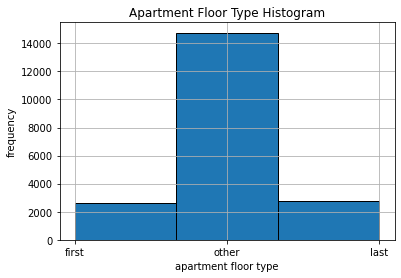

In [88]:
display(data['floor_type'].describe())
gr = data['floor_type'].hist(bins=3, ec='black')
gr.set_title('Apartment Floor Type Histogram')
gr.set_xlabel('apartment floor type')
gr.set_ylabel('frequency');

The number of offers for sale on the first and last floor are the same.

#### 4.1.9. Total number of floors in the house <a id='par_floors_total'> </a>

count    20123.000000
mean        10.641356
std          6.555379
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64

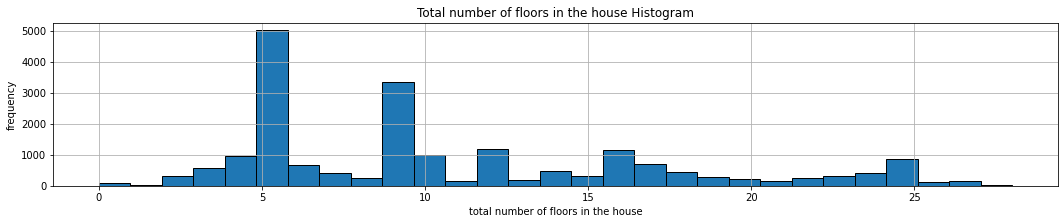

In [89]:
display(data['floors_total'].describe())
gr = data['floors_total'].hist(bins=29, ec='black', figsize=(18, 3))
gr.set_title('Total number of floors in the house Histogram')
gr.set_xlabel('total number of floors in the house')
gr.set_ylabel('frequency');

Yes, as we expected, the largest number of offers for the sale of apartments in five-story and nine-story buildings.

#### 4.1.10. Distance to city center in meters <a id='par_cityCenters_nearest'> </a>

count    15346.000000
mean     14630.906164
std       8516.965839
min        208.000000
25%      10186.000000
50%      13355.000000
75%      16478.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

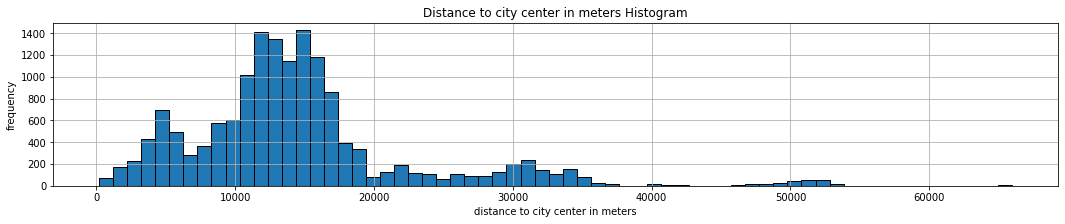

In [90]:
display(data['cityCenters_nearest'].describe())
gr = data['cityCenters_nearest'].hist(bins=65, ec='black', figsize=(18, 3))
gr.set_title('Distance to city center in meters Histogram')
gr.set_xlabel('distance to city center in meters')
gr.set_ylabel('frequency');

They mainly sell apartments located within a radius of 10.5-16.5 km from the center of St. Petersburg, the second peak is apartments within a radius of 5 km from the center, there are offers within a radius of 20-30 km, and 40-50 km are the nearest suburbs.

#### 4.1.11. Distance to nearest airport <a id='par_airports_nearest'> </a>

count    15330.000000
mean     28793.519635
std      12865.973118
min       6450.000000
25%      18090.000000
50%      26833.500000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

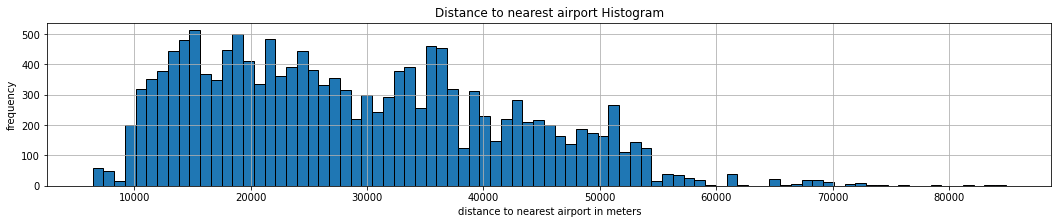

In [91]:
display(data['airports_nearest'].describe())
gr = data['airports_nearest'].hist(bins=85, ec='black', figsize=(18, 3))
gr.set_title('Distance to nearest airport Histogram')
gr.set_xlabel('distance to nearest airport in meters')
gr.set_ylabel('frequency');

The average value is 29 km to the airport. It does not seem that the closer to the airport, the more people want to sell their apartments.

#### 4.1.12. Distance to nearest park <a id='par_parks_nearest'> </a> 

count    6580.000000
mean      493.923252
std       340.006336
min         1.000000
25%       292.000000
50%       458.000000
75%       615.000000
max      3190.000000
Name: parks_nearest, dtype: float64

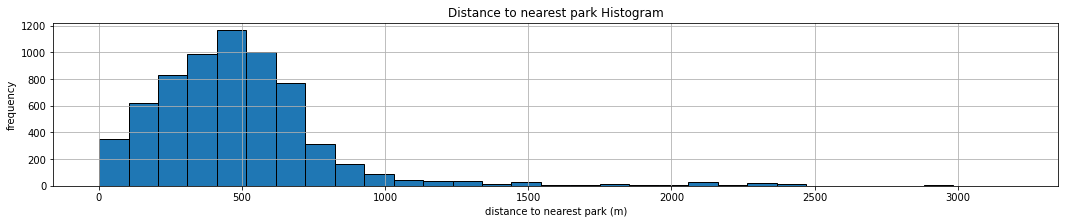

In [92]:
display(data['parks_nearest'].describe())
gr = data['parks_nearest'].hist(bins=31, ec='black', figsize=(18, 3))
gr.set_title('Distance to nearest park Histogram')
gr.set_xlabel('distance to nearest park (m)')
gr.set_ylabel('frequency');

Here we see a normal distribution. The average distance from the apartments for sale to the nearest park is 500 m.

#### 4.1.13.  Day and month of ad publication <a id='par_day_month_of_exposition'> </a>

,first_wkday_exposition,first_month_exposition
count,20123.000000,20123.000000
mean,2.562640,6.416687
std,1.783922,3.470817
min,0.000000,1.000000
25%,1.000000,3.000000
50%,3.000000,6.000000
75%,4.000000,10.000000
max,6.000000,12.000000


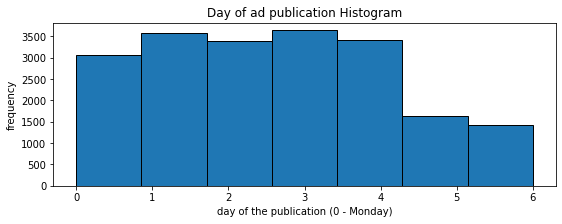

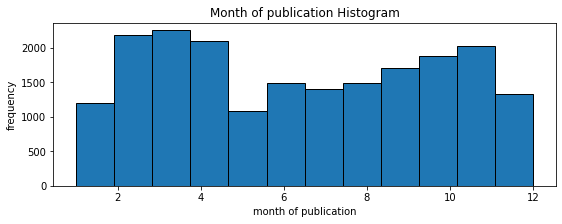

In [93]:
display(data[['first_wkday_exposition', 'first_month_exposition']].describe())
gr = data['first_wkday_exposition'].plot(kind='hist', bins=7, ec='black', figsize=(9, 3));
gr.set_title('Day of ad publication Histogram')
gr.set_xlabel('day of the publication (0 - Monday)')
gr.set_ylabel('frequency');
plt.show()
gr = data['first_month_exposition'].plot(kind='hist', bins=12, ec='black', figsize=(9, 3));
gr.set_title('Month of publication Histogram')
gr.set_xlabel('month of publication')
gr.set_ylabel('frequency');

Most publications are made on weekdays, and the least of weekdays is on Monday. Monday is a tough day. On weekends, there are half as many ads as on weekdays.
Most ads are published from February to April, then May holidays, summer is a dip, and the number of publications increases from mid-summer to November. And in December-January, the decline again due to the New Year holidays.
Most likely half of the ads for the sale of apartments are submitted by real estate agents who do not work on weekends and holidays.

#### 4.1.14. Apartment sale time <a id='par_days_of_exposition'> </a>

count    17457.000000
mean       184.550438
std        219.078432
min          1.000000
25%         40.000000
50%        104.000000
75%        239.000000
max       1553.000000
Name: days_exposition, dtype: float64

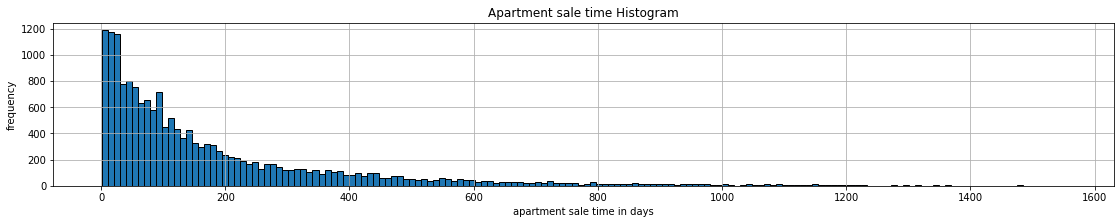

In [94]:
display(data['days_exposition'].describe())
gr = data['days_exposition'].hist(bins=160, ec='black', figsize=(19, 3))
gr.set_title('Apartment sale time Histogram')
gr.set_xlabel('apartment sale time in days')
gr.set_ylabel('frequency');

In section [3.4.5](#days_exposition) we have already considered this parameter in detail and removed the outliers in the sales data for the 45th and 60th days, which did not reflect the real picture of the time the apartment was sold. According to the processed data, we can say that the average time for selling an apartment is 181 days, the median time is 103 days. The fastest sale - in 1 day. The sale in 40 days can be considered fast and successful, as only a quarter of the apartments are sold at such a speed. Terms of sale of an apartment from 40 to 234 days can be called standard. A long sale can be considered more than 235 days. The median and standard deviation lift up abnormally large values ​​of the sale time up to 4 years. What they are associated with is not yet clear. Let's see how the average sale time depends on the year of publication.

In [95]:
days_exposition_by_year_of_exposition = data.pivot_table(index='first_year_exposition', values='days_exposition', aggfunc=['count', 'mean', 'median'])
days_exposition_by_year_of_exposition.index.name = 'publication year'
days_exposition_by_year_of_exposition.columns = ['number of ads', 'mean sale time', 'median sale time']
days_exposition_by_year_of_exposition

,number of ads,mean sale time,median sale time
publication year,,,
2014,86,907.430233,872.5
2015,979,639.045965,566.0
2016,2384,327.131711,246.0
2017,6759,162.303891,111.0
2018,6314,97.251029,72.0
2019,935,28.978610,21.0


From the pivot table, it can be seen that the sale time decreases every year. Apparently, the crisis of 2014 greatly cooled the real estate market so that the apartments offered for sale in 2014-2016 were sold only in 2017-2018. This means that the anomalously long sale terms really reflect the real situation in the economy and the real estate market.

#### 4.1.15. Conclusions <a id='conclusions_4_1'> </a>

As a result of studying the parameters of apartments presented in the data set, the following interesting features were revealed:
1) very few studios are put up for sale: only 0.7% of the total number of apartments. People don't sell studios, they rent them out;  
2) most of the apartments are sold in 5 and 9 storey buildings;  
3) half of the advertisements for the sale of apartments are published by real estate agents who do not work on weekends and public holidays;  
4) the average term for the sale of an apartment is 180 days, the median is 100 days. Apparently, the economic crisis of 2014 had a strong impact on the terms for the sale of apartments, causing abnormally large values of 2.5-4 years.

### 4.2. Study of the influence of parameters on the cost of an apartment <a id='parameters_to_price'> </a>

We will study the influence of the total area, living area, kitchen area, number of rooms, floor on which the apartment is located (first, last, second), placement date (day of the week, month, year) on the total cost of the apartment and find which factors have the greatest impact . To do this, we plot the dependence of the median apartment price on each parameter value and calculate the Pearson correlation coefficient for the apartment price and each of the parameters.

,parameter,pearson_correlation_coefficient
0,total area,0.74
1,living area,0.63
2,kitchen area,0.53
3,number of rooms,0.46
5,day of exposition,-0.02
7,year of exposition,-0.01
6,month of exposition,0.00
4,apartment floor,NaN


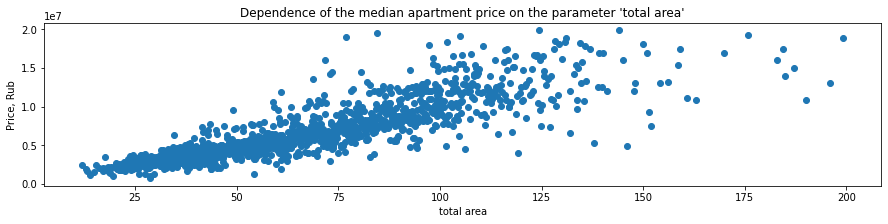

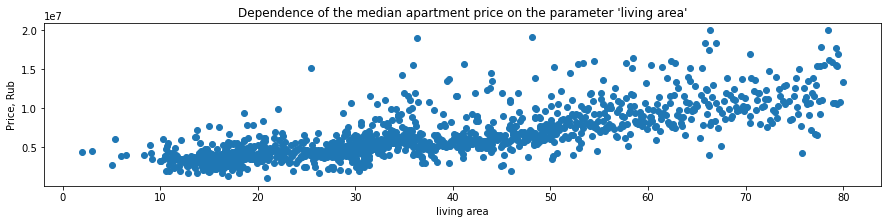

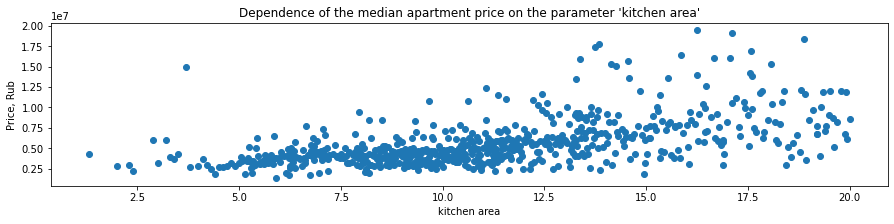

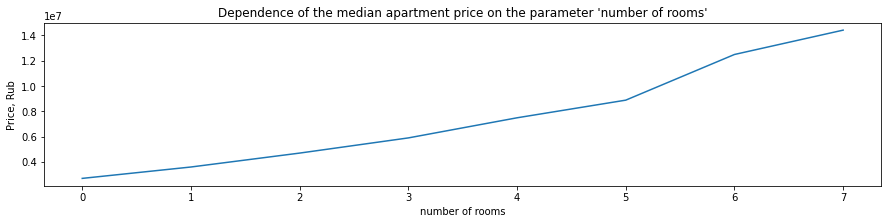

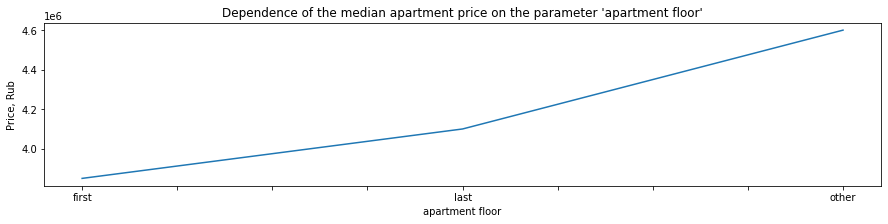

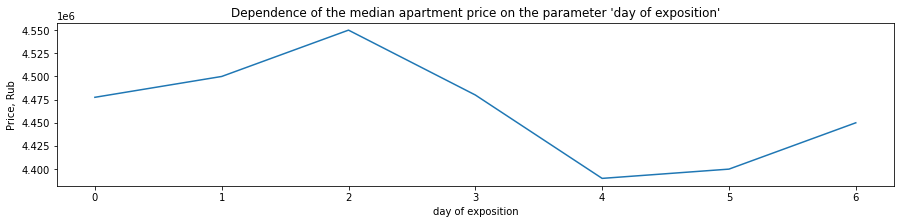

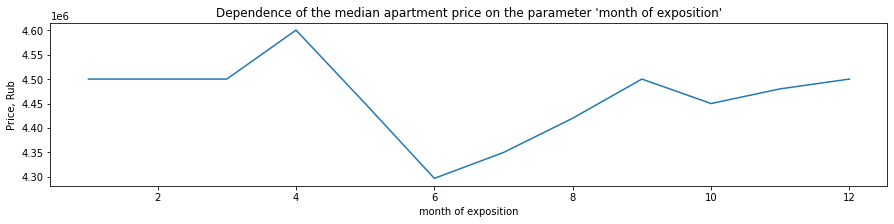

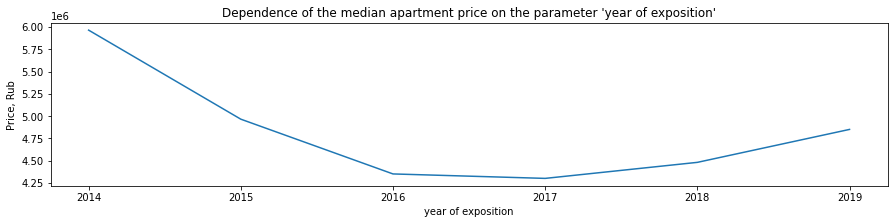

In [96]:
factor_columns = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'first_wkday_exposition', 
                  'first_month_exposition', 'first_year_exposition']
factor_names = ['total area', 'living area', 'kitchen area', 'number of rooms', 'apartment floor', 
                'day of exposition', 'month of exposition', 'year of exposition']
factors_influence_data = pd.DataFrame({'parameter': [], 
                                       'pearson_correlation_coefficient': [],
                                       'pearson_correlation_coefficient_abs': []})
for i in range(len(factor_columns)):
    tittle = 'Dependence of the median apartment price on the parameter \'' + factor_names[i] + '\''
    xlabel = factor_names[i]
    if factor_columns[i] in ['total_area', 'living_area', 'kitchen_area']:
        (data.pivot_table(index=factor_columns[i], values='last_price', aggfunc=['median'])
         .plot(title=tittle, xlabel=xlabel, ylabel = 'Price, Rub', style='o', legend=False, figsize=(15, 3)))
    else:
        (data.pivot_table(index=factor_columns[i], values='last_price', aggfunc=['median'])
         .plot(title=tittle, xlabel=xlabel, ylabel = 'Price, Rub', style='-', legend=False, figsize=(15, 3)))
    try:
        pirson = data[factor_columns[i]].corr(data['last_price']).round(2)
        factors_influence_data = factors_influence_data.append({'parameter': factor_names[i], 
                                       'pearson_correlation_coefficient': pirson,
                                       'pearson_correlation_coefficient_abs': abs(pirson)}, ignore_index=True)
    except:
        factors_influence_data = factors_influence_data.append({'parameter': factor_names[i], 
                                       'pearson_correlation_coefficient': np.nan,
                                       'pearson_correlation_coefficient_abs': np.nan}, ignore_index=True)
factors_influence_data.sort_values(by='pearson_correlation_coefficient_abs', ascending=False)[['parameter', 'pearson_correlation_coefficient']]

##### Conclusions

The total area has the greatest impact on the total cost of the object. There is a fairly close direct relationship (Pearson's correlation coefficient 0.74): the larger the area of ​​the apartment, the higher the price. There is also a direct dependence of the price on living space and kitchen area (Pearson's coefficients are 0.63 and 0.53, respectively). There is also a direct relationship between the price of an apartment and the number of rooms, but it is weaker (Pearson coefficients 0.46): the more rooms, the more expensive the apartment, but this rule does not work for 5-room apartments, since they are cheaper than 4-room apartments . The dependence of the cost of an apartment on the floor is as follows: apartments on the first floor are on average 5% cheaper than apartments on the top floor. There is no direct relationship between the day of the week, month, year of placement of the advertisement and the price of the apartment (Pearson's correlation coefficient is 0.01), but there are some regularities. For example, apartments listed on Wednesday are 5% more expensive than apartments listed on Friday. Apartments placed in June are 5% cheaper than the average price for the year and 7% cheaper than those placed in April. The most expensive apartments are advertised in April. In 2014, the median price of an apartment was 30% higher than in 2017. This explains why apartments placed in 2014-2015 were sold for 2-3 years. Since 2017, the cost of apartments has gone up and in 2019 it reached the level of 2015.

### 4.3. Calculation of the average price per square meter by settlements <a id='price_per_m2'> </a>

Let's calculate the average price of one square meter in 10 settlements with the largest number of ads and highlight the settlements with the highest and lowest cost per square meter.

In [97]:
mean_price_per_sq_m_by_locality = (data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean'])
 .sort_values(by=('count', 'price_per_square_meter'), ascending=False).head(10))
mean_price_per_sq_m_by_locality.index.name = 'locality_name'
mean_price_per_sq_m_by_locality.columns = ['number_of_ads', 'mean_price_for_square_meter']
mean_price_per_sq_m_by_locality['mean_price_for_square_meter'] = mean_price_per_sq_m_by_locality['mean_price_for_square_meter'].round(2)
display(mean_price_per_sq_m_by_locality.sort_values(by='mean_price_for_square_meter', ascending=False))
print(f"Locality with the highest cost per square meter: {mean_price_per_sq_m_by_locality['mean_price_for_square_meter'].idxmax()}")
print(f"Locality with the lowest cost per square meter: {mean_price_per_sq_m_by_locality['mean_price_for_square_meter'].idxmin()}")

,number_of_ads,mean_price_for_square_meter
locality_name,,
Санкт-Петербург,13213,108262.22
Пушкин,315,101027.68
деревня Кудрово,252,92953.06
посёлок Парголово,288,90709.02
посёлок Мурино,503,85621.44
посёлок Шушары,392,79103.10
Колпино,291,75465.46
Гатчина,271,68311.94
Всеволожск,346,66821.53


Locality with the highest cost per square meter: Санкт-Петербург
Locality with the lowest cost per square meter: Выборг


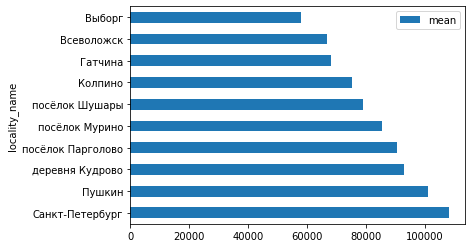

In [98]:
(
    data
    .groupby('locality_name')['price_per_square_meter']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).plot(y = 'mean', kind = 'barh');

### 4.4. Calculation of the average price per kilometer to the city center <a id='price_per_km'> </a>

Previously, we calculated the distance to the center in kilometers. We select apartments in St. Petersburg and calculate the average price for each kilometer to the center. Let's see how the cost of objects depends on the distance to the city center.

Average price of one kilometer to the center: 801396.0
Pearson's correlation coefficient for apartment cost and distance to the center: -0.4
Pearson's correlation coefficient for the average price of each kilometer to the center and distance to the center: -0.61


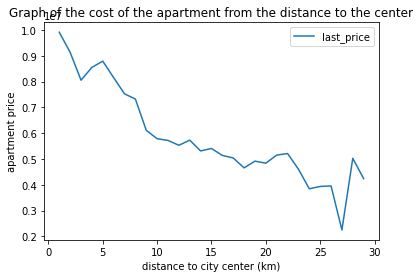

In [99]:
data = data.dropna(subset=['last_price', 'cityCenters_nearest_km'])
data = data.loc[(data['last_price'] != 0) & 
                (data['cityCenters_nearest_km'] != 0) & 
                (data['locality_name'] == 'Санкт-Петербург')]
data['price_per_km'] = data['last_price'] / data['cityCenters_nearest_km']
(data.pivot_table(index='cityCenters_nearest_km', values=['last_price'])
 .plot(title='Graph of the cost of the apartment from the distance to the center', xlabel='distance to city center (km)', 
       ylabel='apartment price', style='-'))
print(f"Average price of one kilometer to the center: {data['price_per_km'].mean().round(0)}")
print(f"Pearson's correlation coefficient for apartment cost and distance to the center: \
{data['cityCenters_nearest_km'].corr(data['last_price']).round(2)}")
print(f"Pearson's correlation coefficient for the average price of each kilometer to the center and distance to the center: \
{data['cityCenters_nearest_km'].corr(data['price_per_km']).round(2)}")

We will also look at the dependence of the price per square meter on the distance to the center.

Pearson's correlation coefficient for price per sq.m. and distance to the center: -0.34


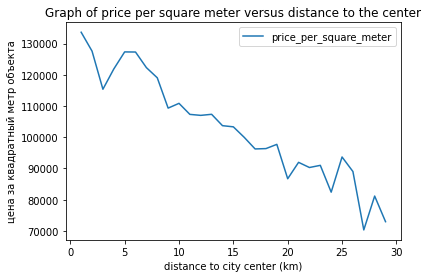

In [100]:
(data.pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter')
 .plot(title='Graph of price per square meter versus distance to the center', xlabel='distance to city center (km)', 
       ylabel='цена за квадратный метр объекта', style='-'))
print(f"Pearson's correlation coefficient for price per sq.m. and distance to the center: \
{data['price_per_square_meter'].corr(data['cityCenters_nearest_km']).round(2)}")

##### Conclusions

As you move away from the center, the price for the object decreases. The correlation coefficient is -0.4, which indicates a moderate inverse relationship between these two parameters. There are anomalies on the charts, such as a dip in total cost and price per sq. m. for objects within a radius of 3 km from the center.

## 5. Research results <a id='research_results'> </a>

In this work, an archive of ads for several years for the sale of apartments in St. Petersburg and neighboring settlements of the Yandex Real Estate service was studied.
Data preprocessing was performed - gaps and anomalous values ​​were processed, duplicates were removed, data types were changed in some columns and new columns were added for data analysis. A large number of lines were found (23% of the total) with a complete lack of cartographic data. It is necessary to carry out work to identify and eliminate the causes of gaps. The omissions in the data added by the seller are mainly caused by the fact that the form fields are optional and the seller does not know the parameters of his apartment. To reduce gaps in the data, you can make all fields of the form mandatory for the seller and add background information about the differences between apartments and apartments and where the seller can look at apartment parameters such as ceiling height, living area and kitchen area to fill in all fields of the listing .
Further, the data was studied and interesting features and dependencies that exist in the real estate market were revealed:  
1) very few studio apartments are put up for sale: only 0.7% of the total number of apartments. People don't sell studios, they rent them out;  
2) most of the apartments are sold in 5 and 9-storey buildings;  
3) two times less ads are published on weekends and holidays than on weekdays;  
4) the total area has the greatest influence on the total cost of apartments. There is a fairly close direct relationship: the larger the area of the apartment, the higher the price;  
5) there is a direct relationship between the price of an apartment and the number of rooms, but it does not work for 5-room apartments, since they are cheaper than 4-room ones;  
6) apartments on the first floor are on average 5% cheaper than apartments on the top floor. Between the day of the week, month, year of placement;  
7) apartments, which were advertised for sale on Wednesday, are 5% more expensive than apartments posted on Friday;  
8) apartments, the sale announcements of which were placed in June 5% cheaper than the average price for the year and 7% cheaper than those placed in April, and the most expensive apartments are advertised in April;  
9) in 2014, the median price of an apartment was 30% higher than in 2017, and since 2017, the cost of apartments has gone up and in 2019 reached the level of 2015;  
10) the average term for the sale of an apartment is 180 days, the median is 100 days. Apartments placed in 2014-2015 were sold for 2 to 4 years due to high prices and the economic crisis;  
11) the locality with the highest cost per square meter is St. Petersburg, and the lowest - Vyborg;  
12) the average price of one kilometer to the center is 730411 rubles;  
13) with increasing distance from the center, the price for an object decreases, but objects within a radius of 3 km from the center are on average cheaper than those within a radius of 5 km.